In [3]:
import dyn.dyn.datasets.experimental as experimental

import importlib
importlib.reload(experimental)
center_traj, shapes_traj = experimental.load_trajectory_of_border_cells(n_sampling_points=180)

['/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/104438_MAX_9-10.tif', '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/104438_MAX_9-11.tif', '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/104438_MAX_9-7.tif', '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/104438_MAX_9-8.tif', '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/33623_MAX_9-1-28.tif', '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/33623_MAX_9-1.tif', '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/33623_MAX_9-2-1-28.tif', '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/33623_MAX_9-2.tif', '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/33623_MAX_9-3.tif', '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/33623_MAX_9-5.tif', '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion

In [4]:
center_traj.shape

(16, 25, 2)

In [5]:
shapes_traj.shape

(16, 25, 180, 2)

/var/folders/dz/k1hb2xr94k558sjs416njdp40000gn/T/ipykernel_38846/1595793442.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


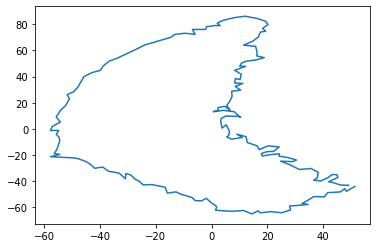

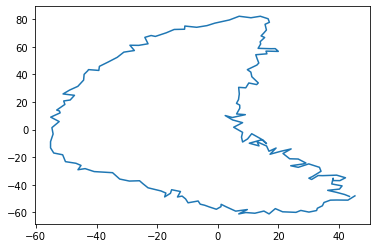

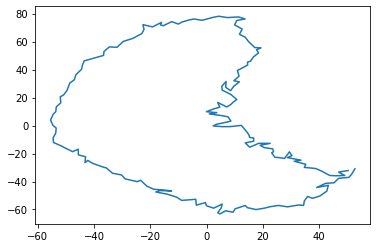

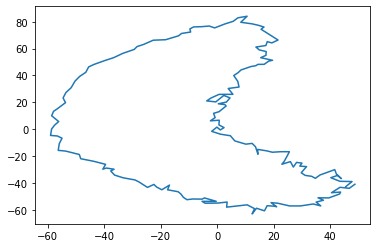

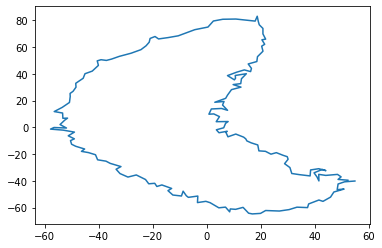

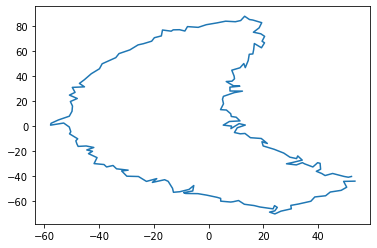

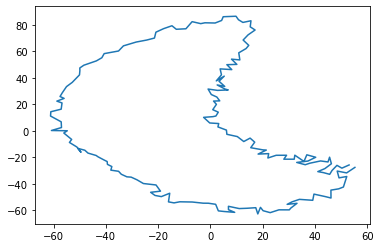

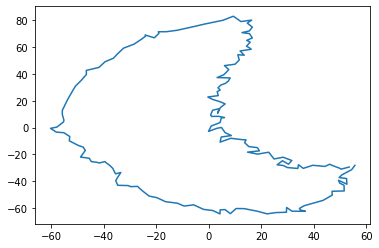

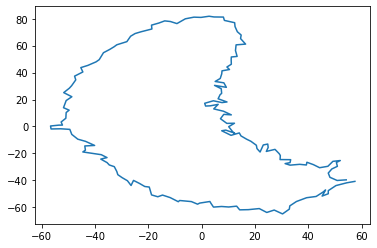

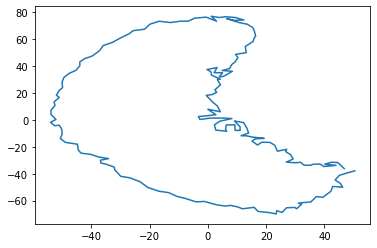

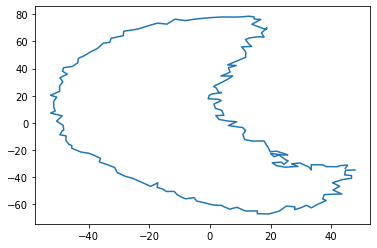

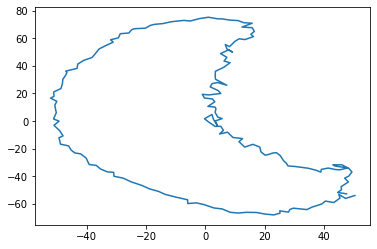

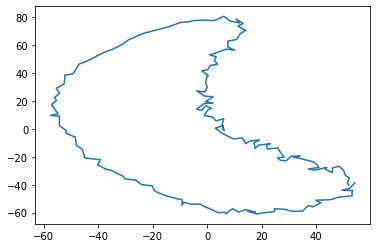

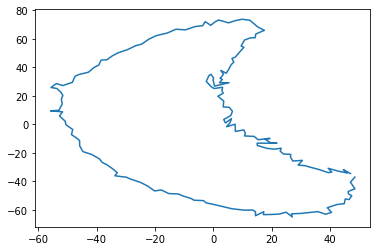

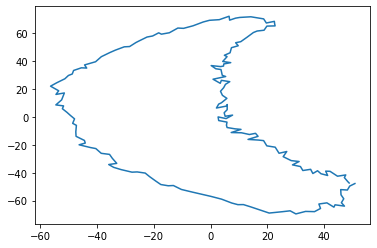

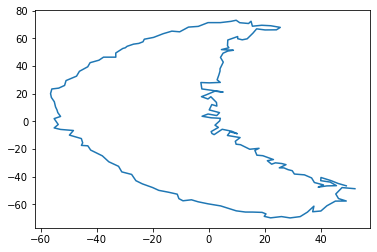

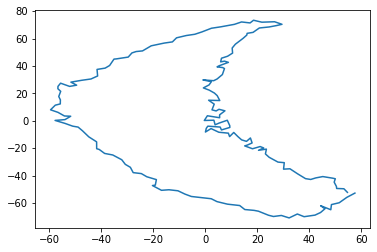

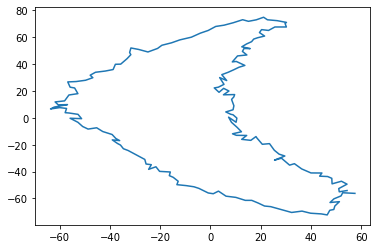

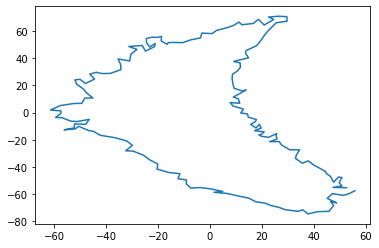

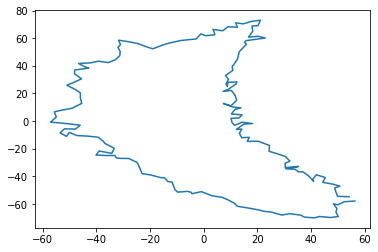

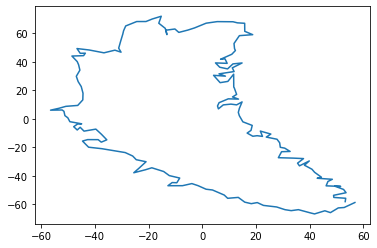

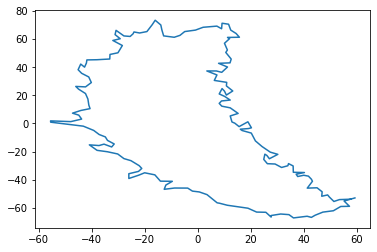

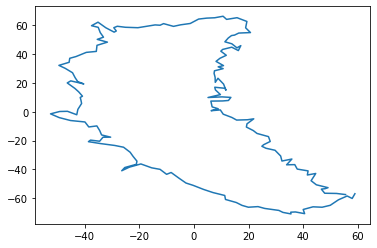

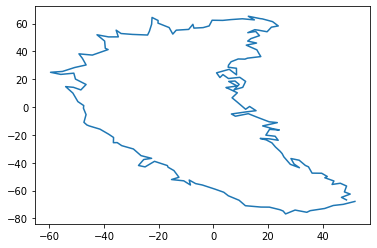

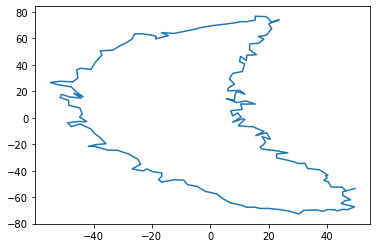

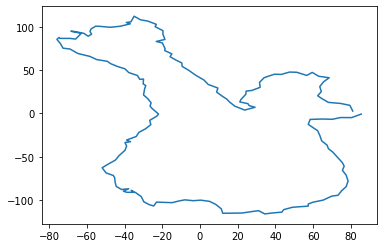

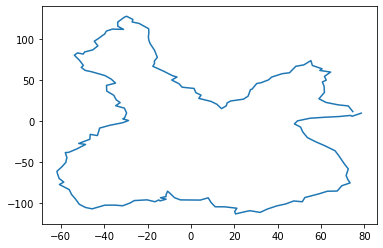

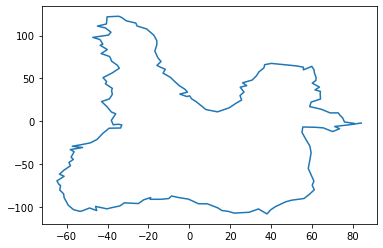

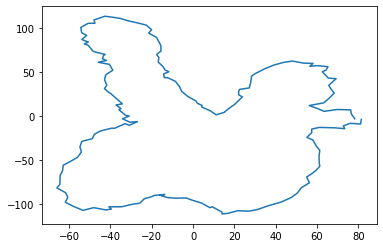

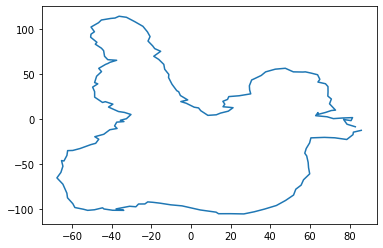

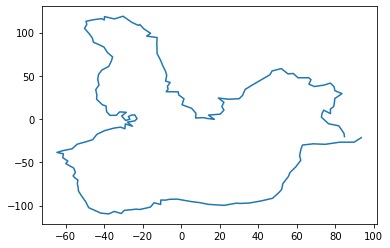

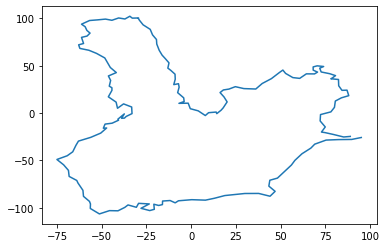

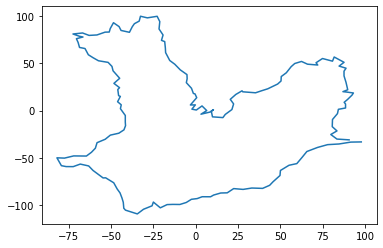

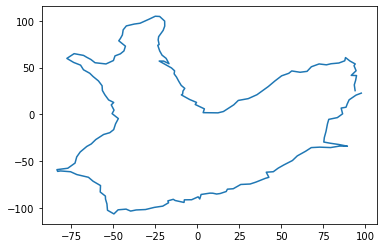

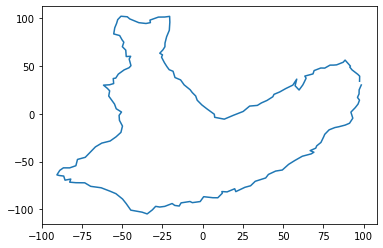

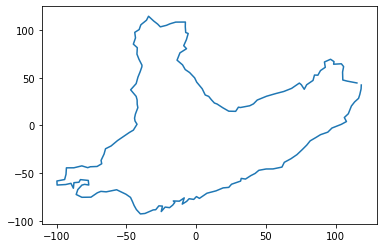

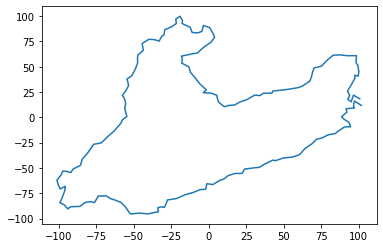

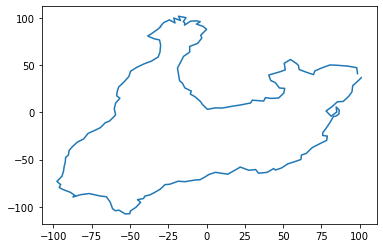

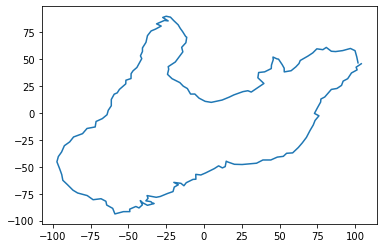

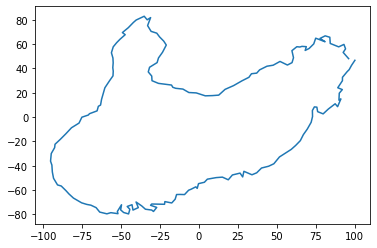

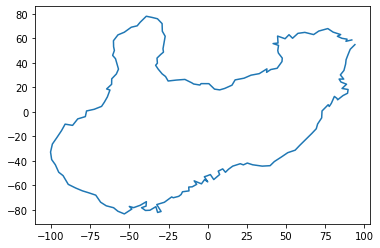

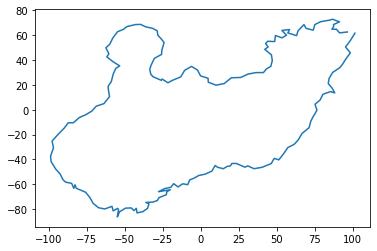

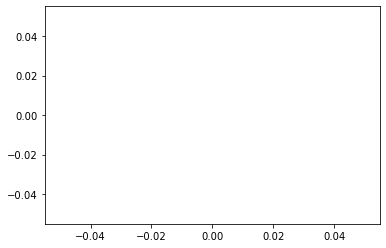

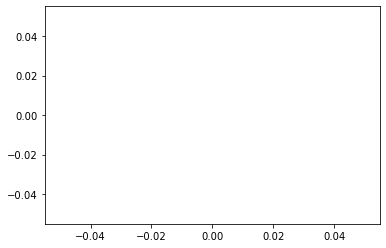

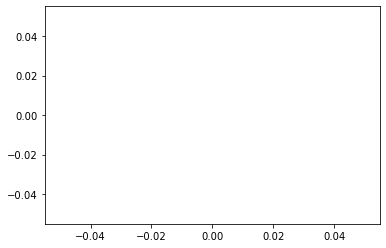

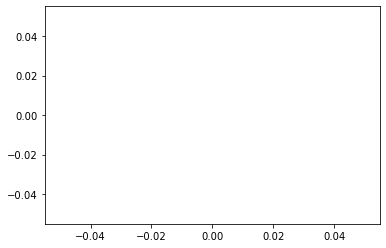

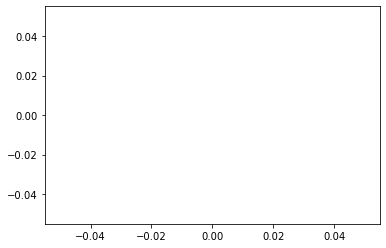

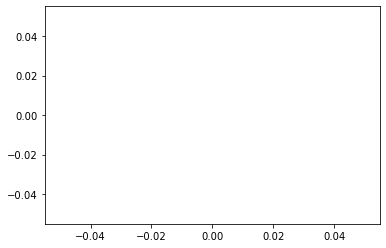

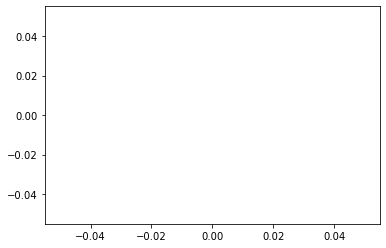

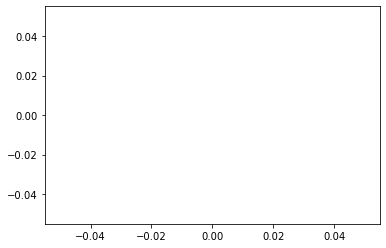

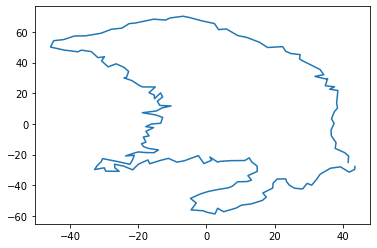

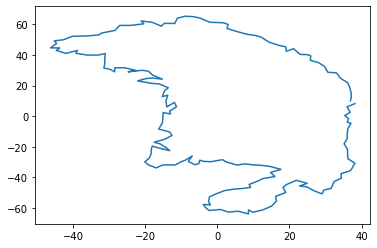

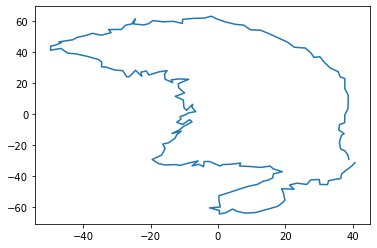

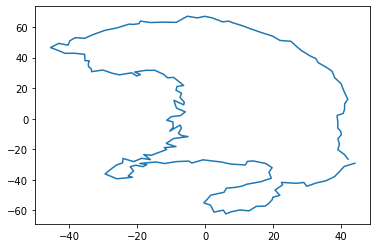

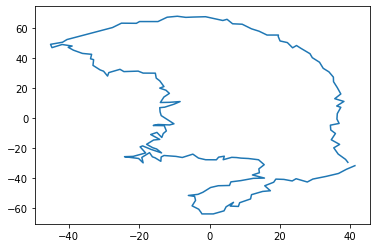

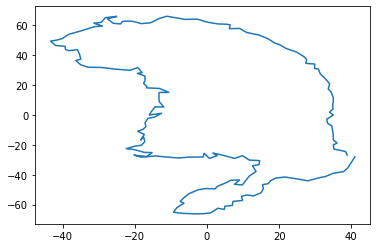

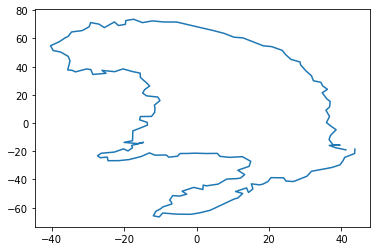

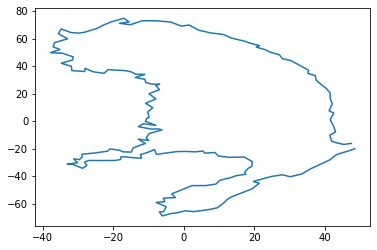

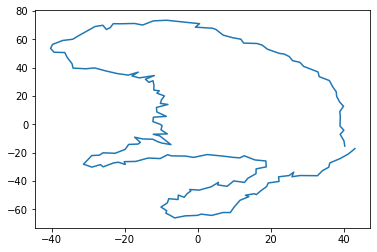

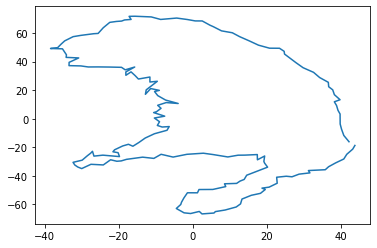

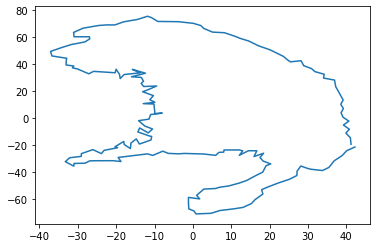

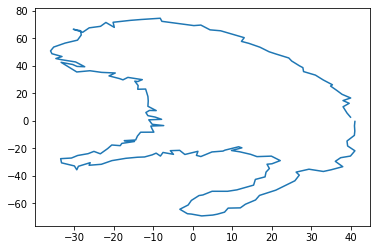

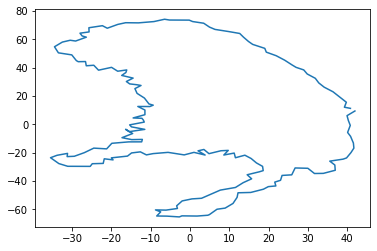

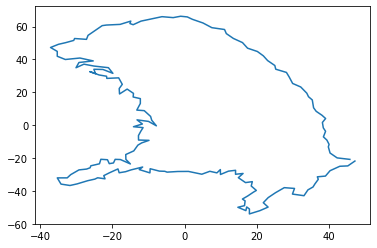

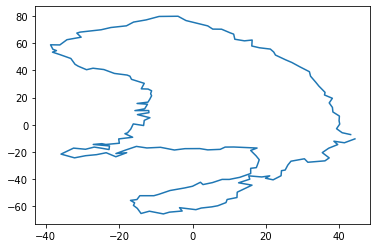

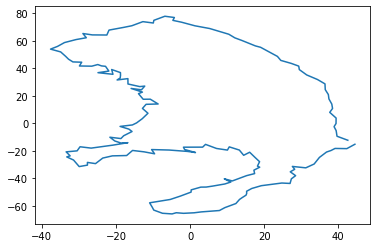

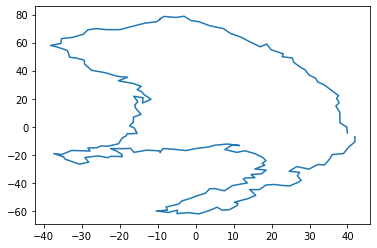

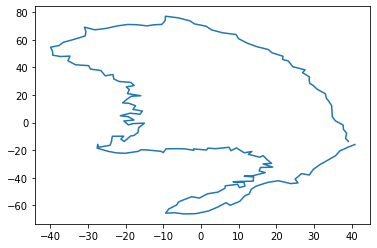

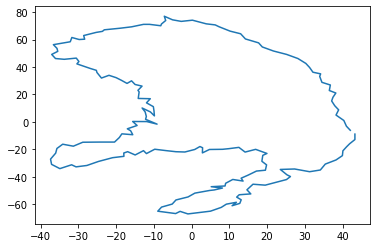

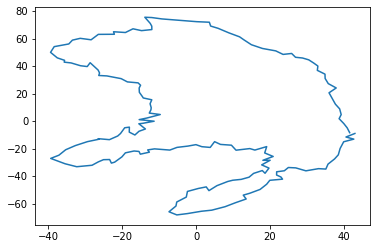

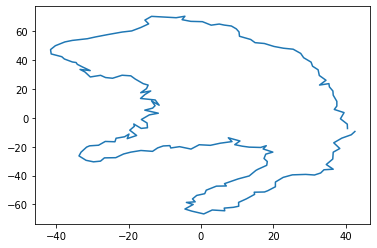

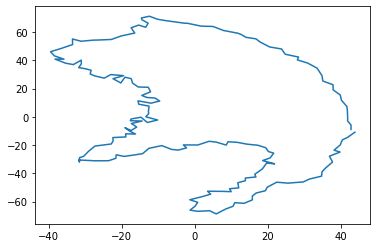

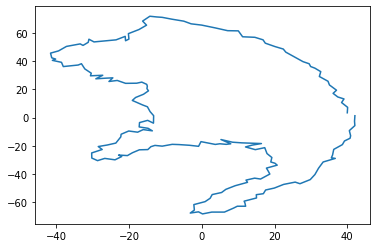

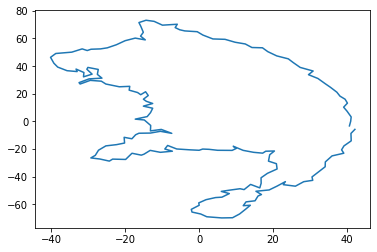

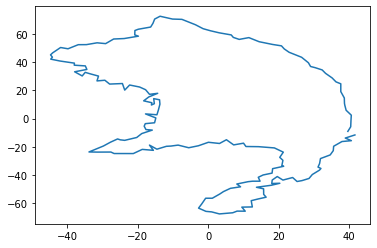

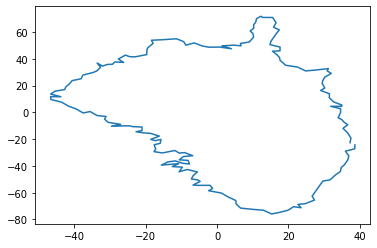

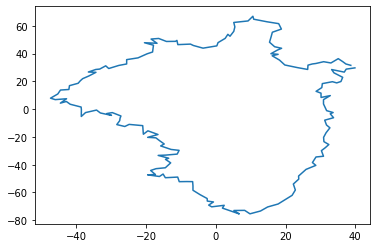

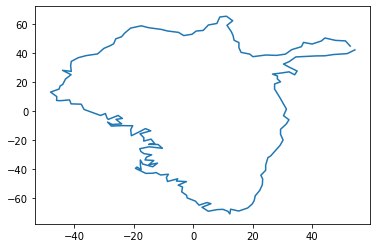

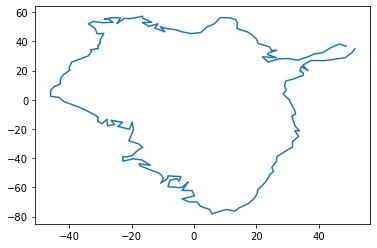

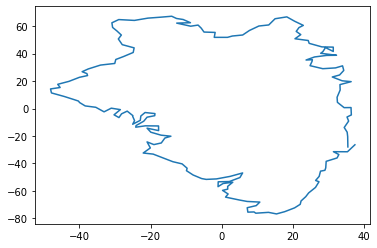

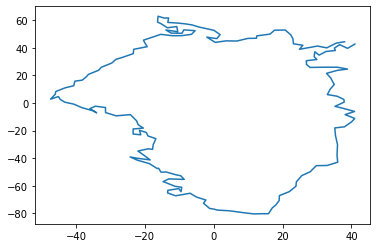

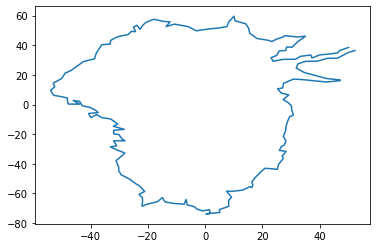

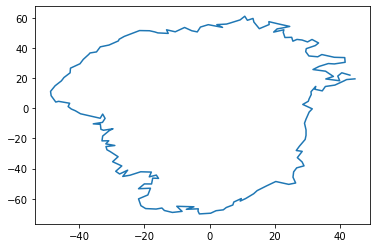

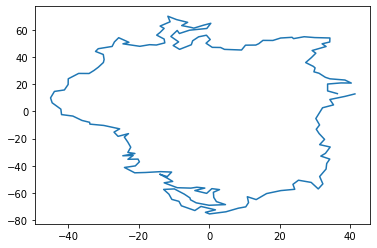

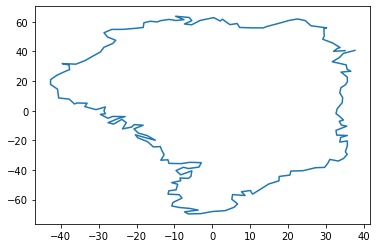

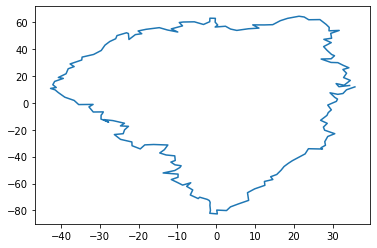

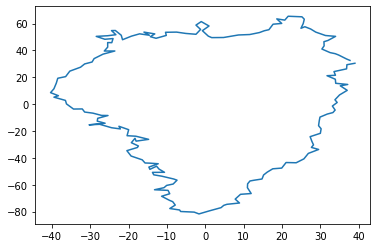

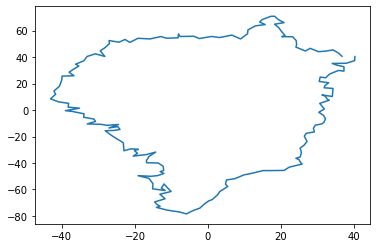

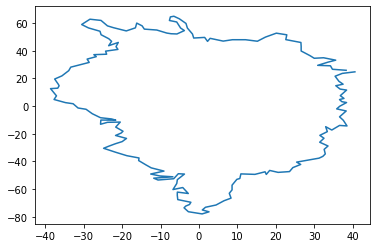

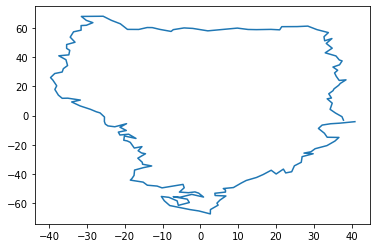

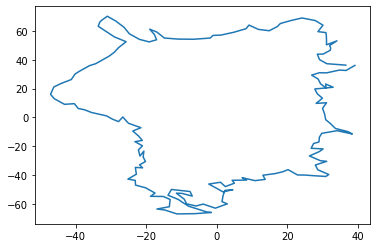

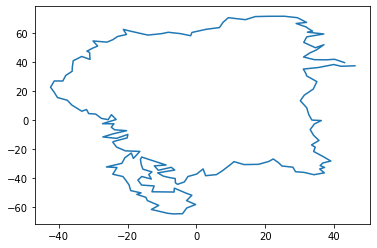

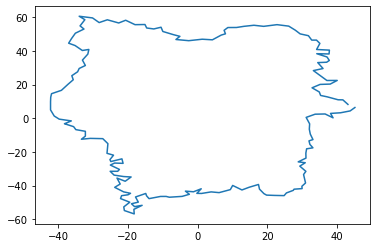

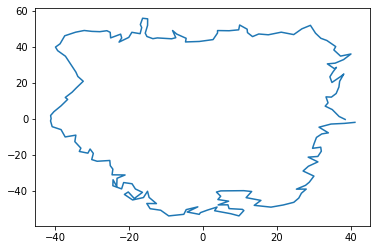

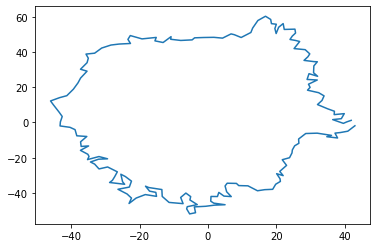

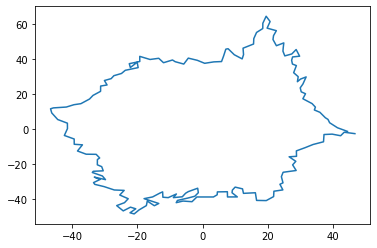

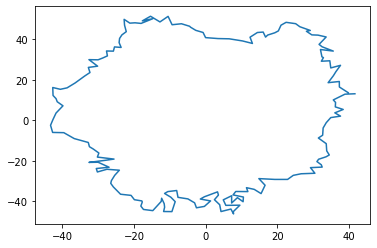

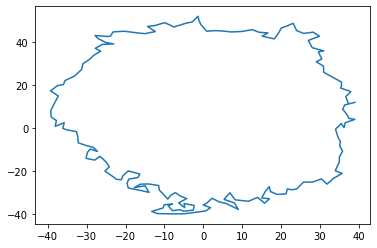

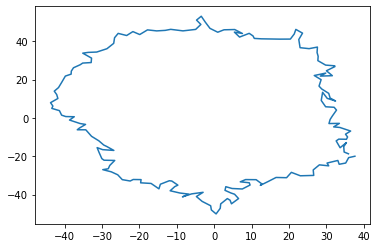

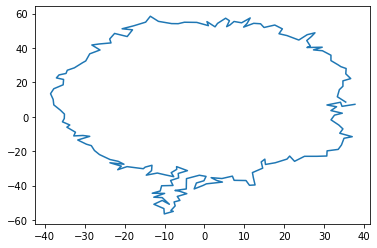

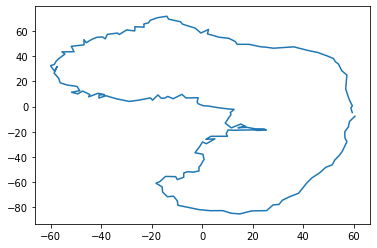

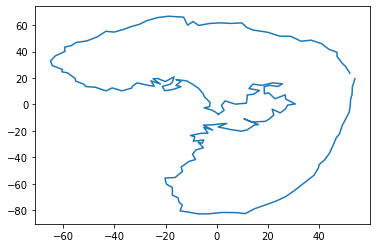

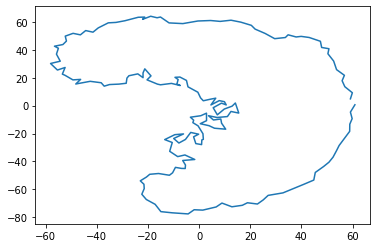

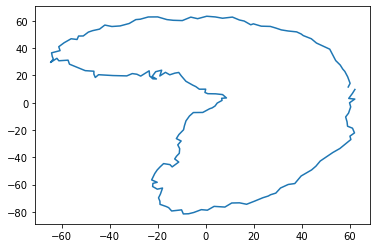

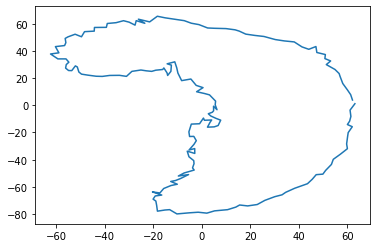

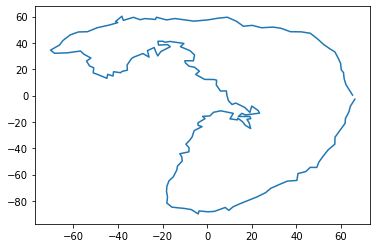

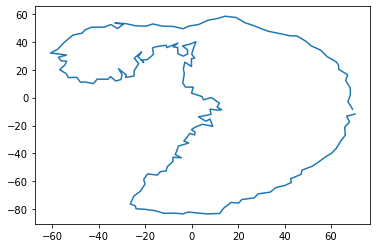

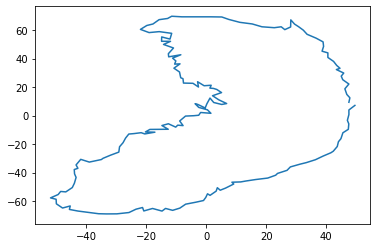

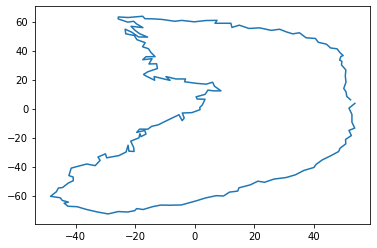

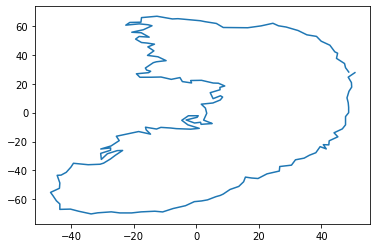

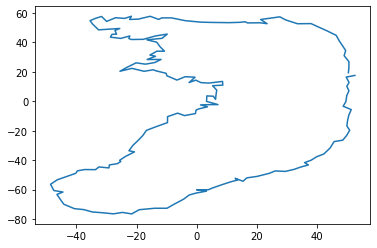

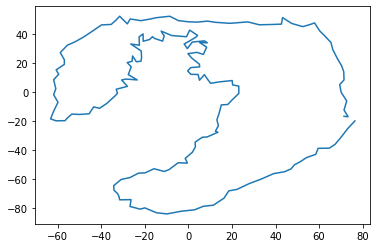

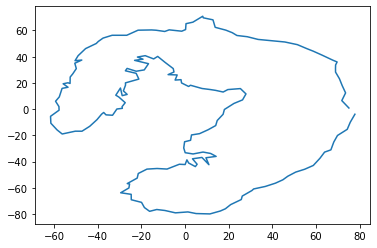

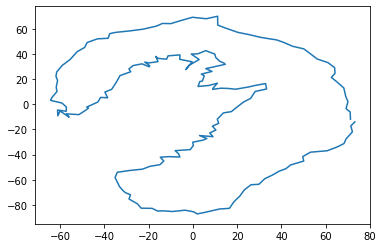

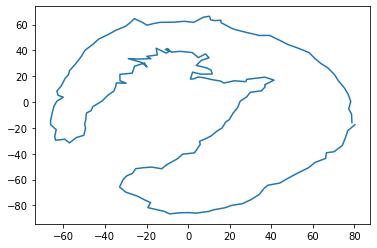

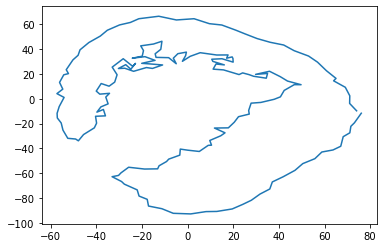

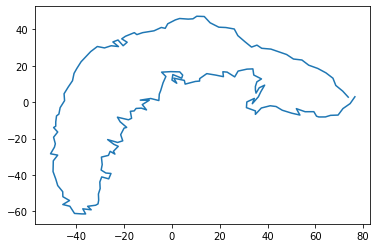

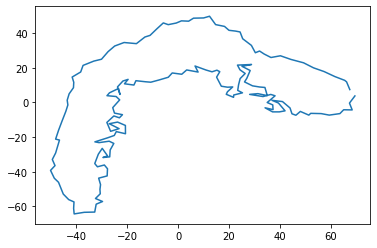

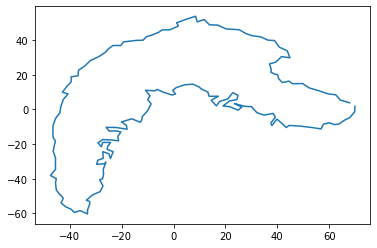

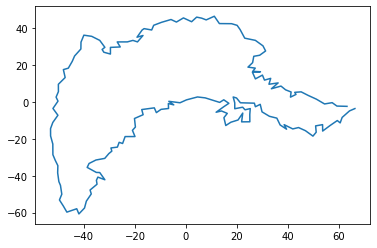

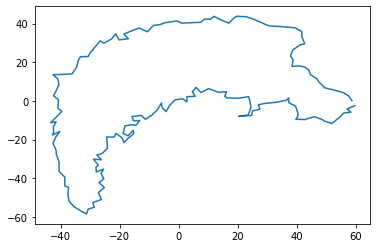

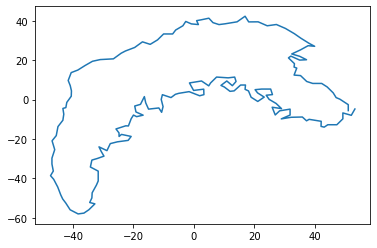

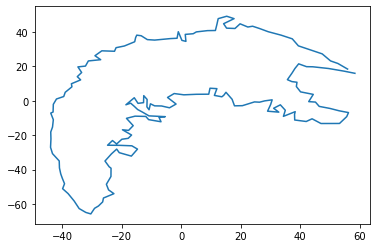

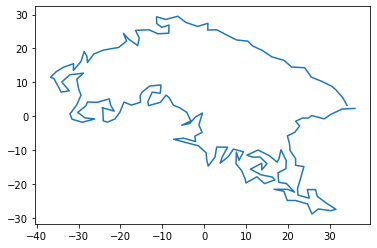

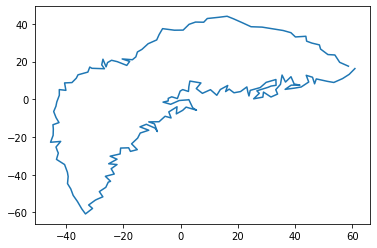

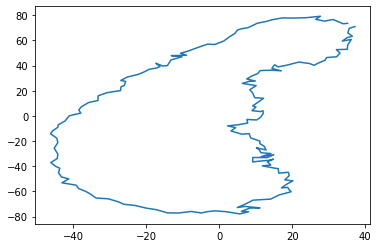

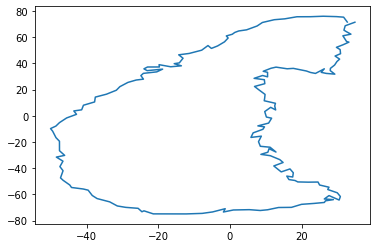

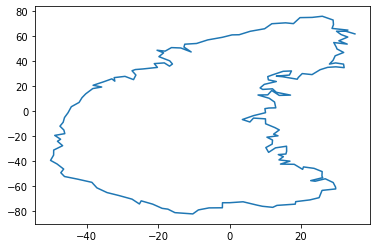

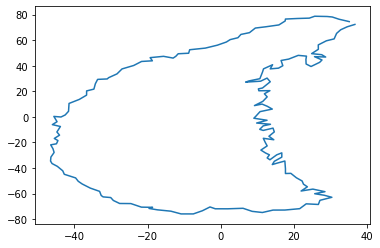

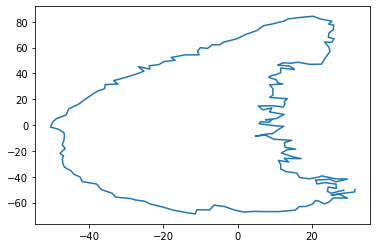

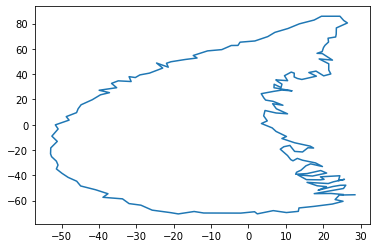

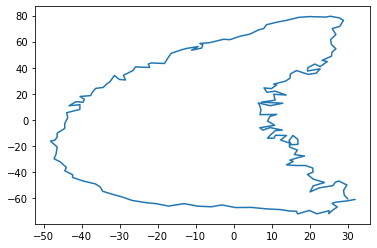

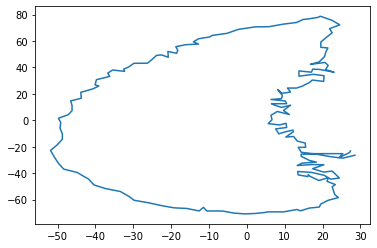

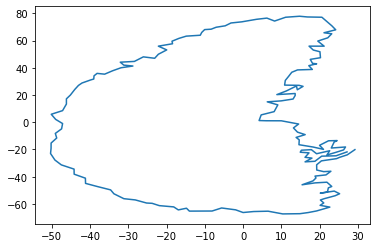

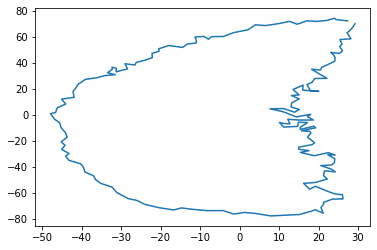

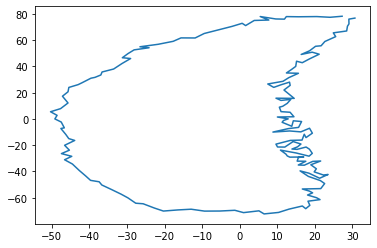

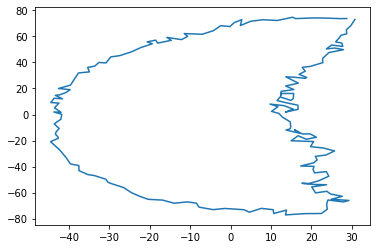

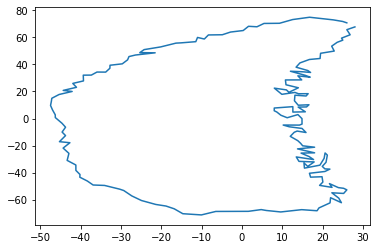

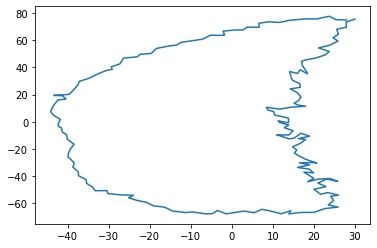

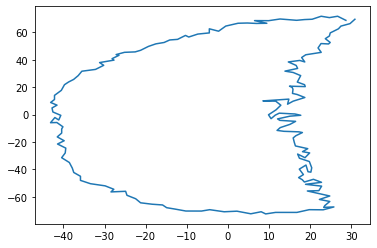

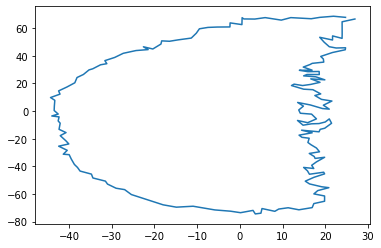

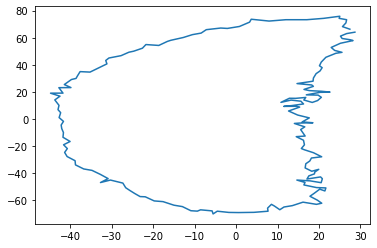

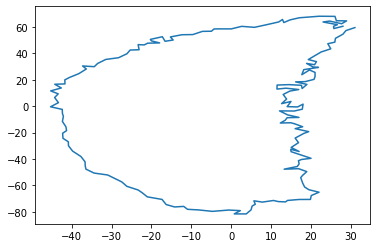

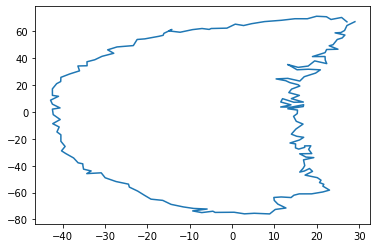

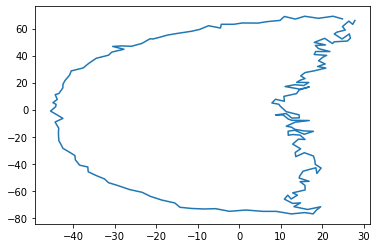

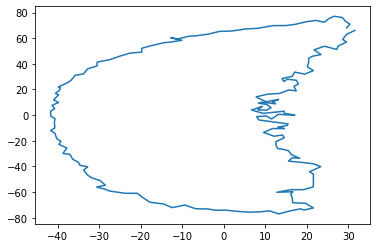

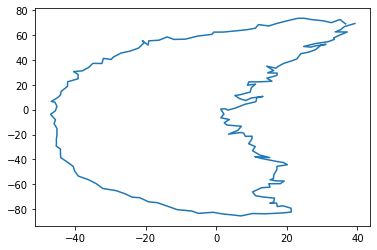

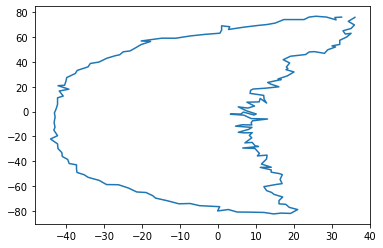

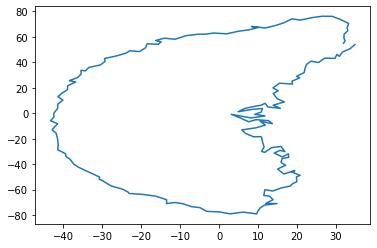

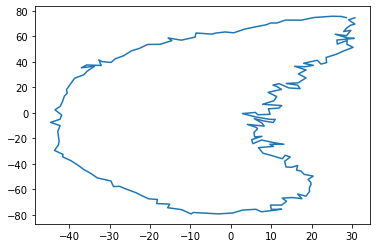

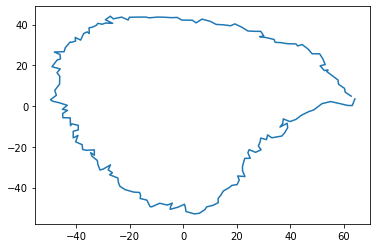

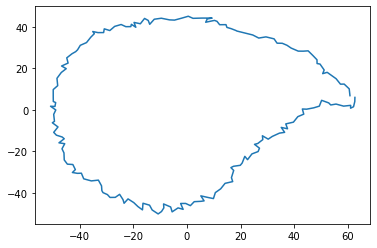

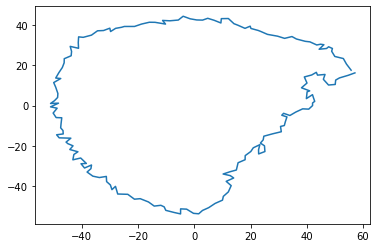

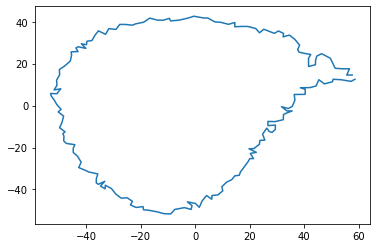

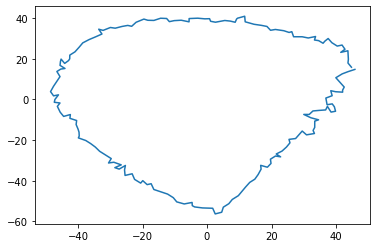

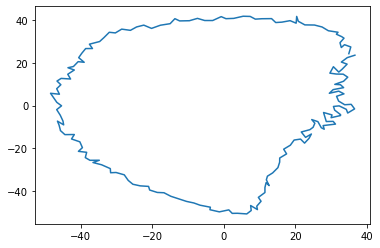

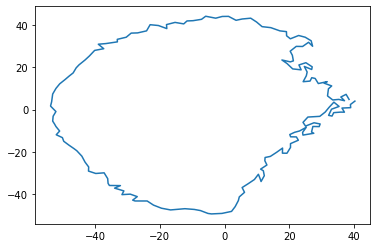

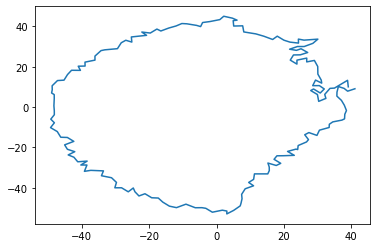

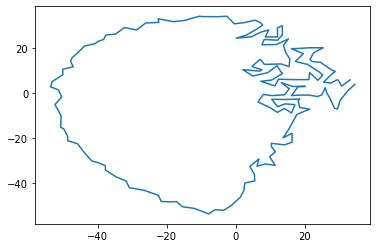

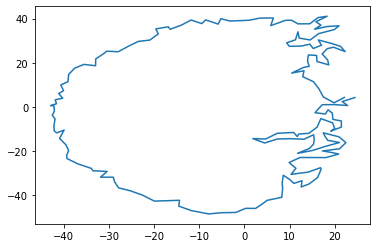

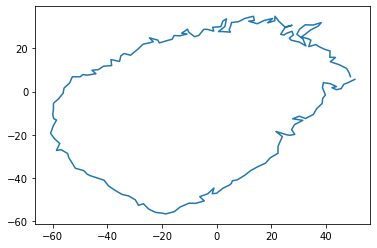

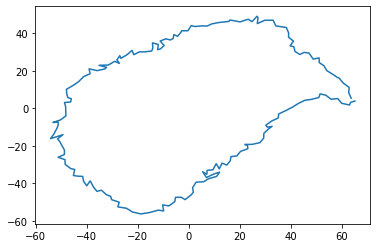

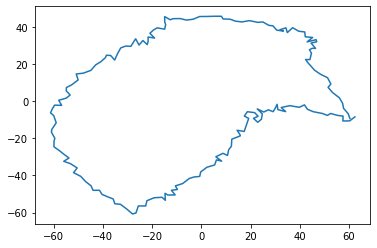

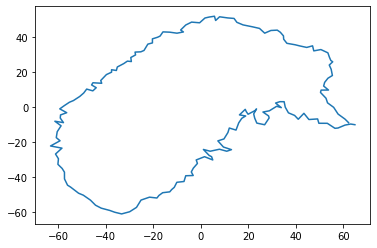

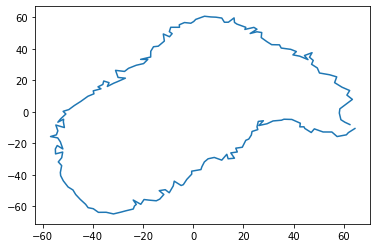

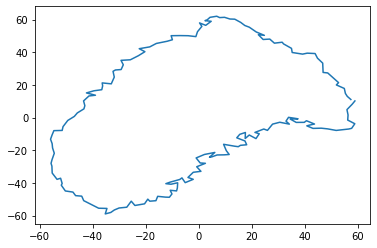

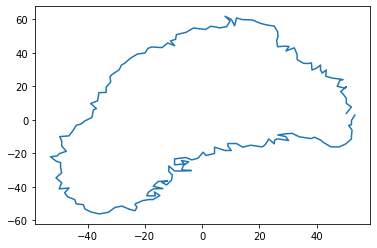

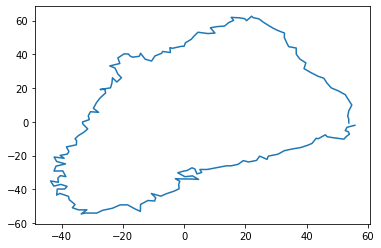

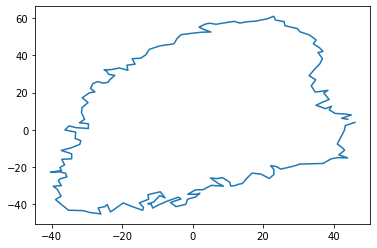

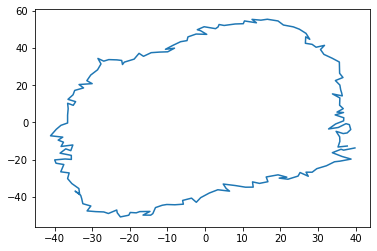

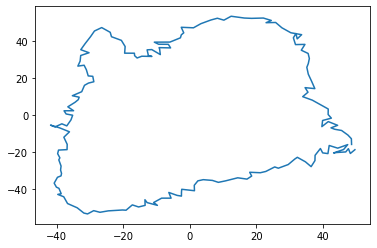

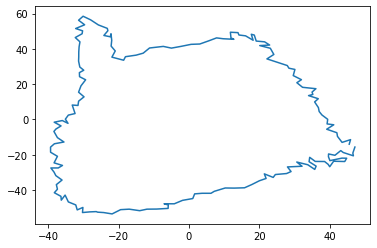

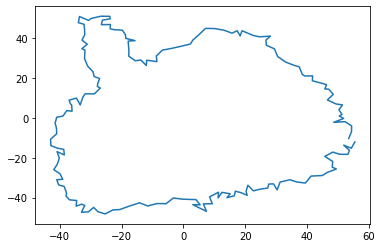

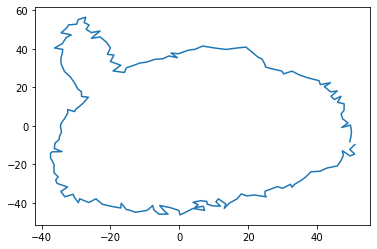

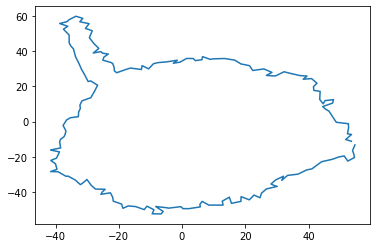

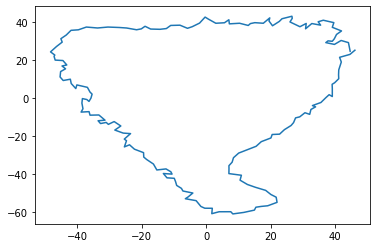

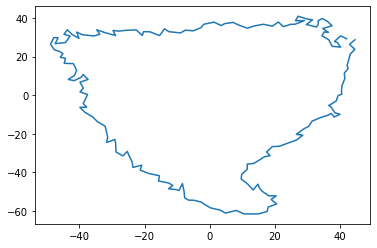

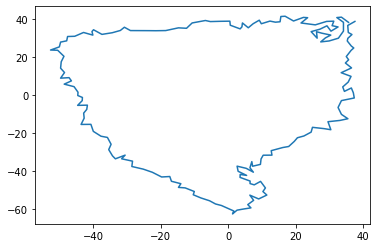

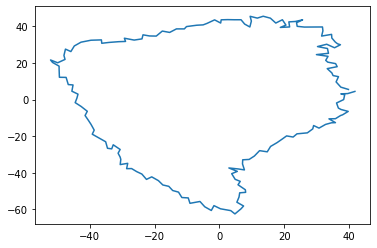

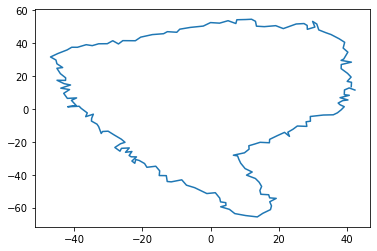

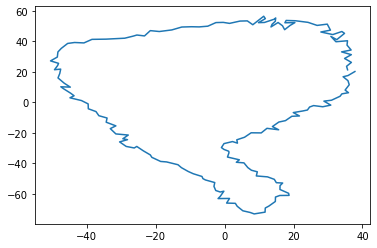

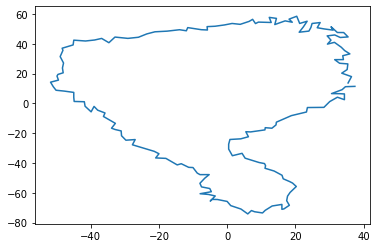

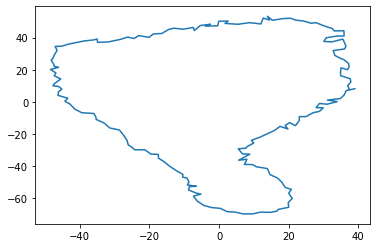

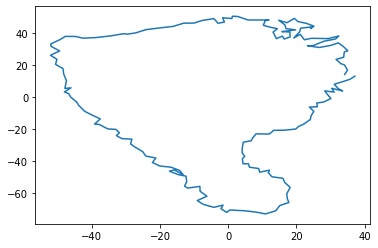

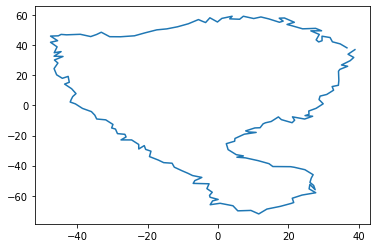

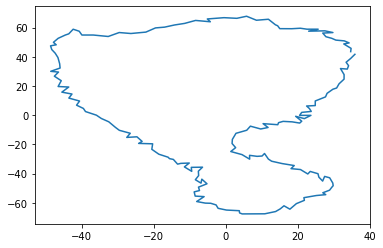

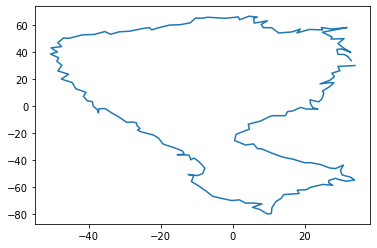

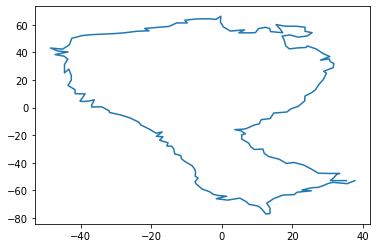

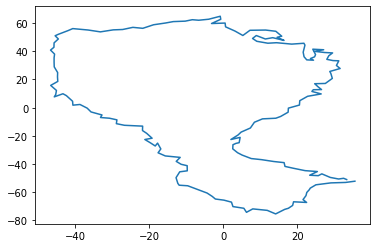

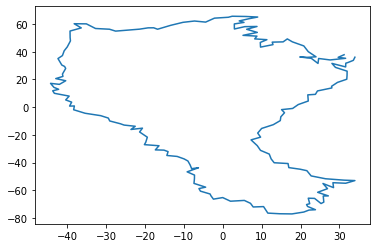

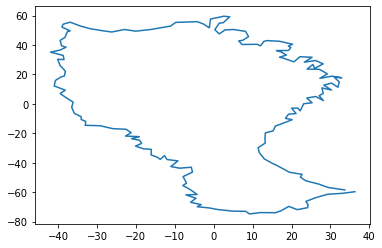

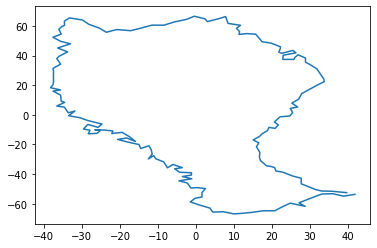

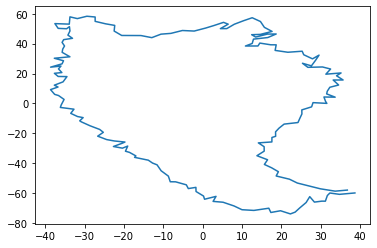

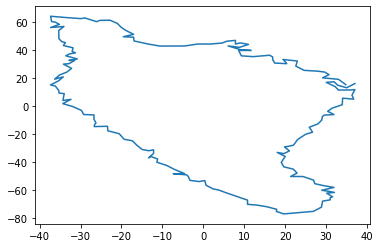

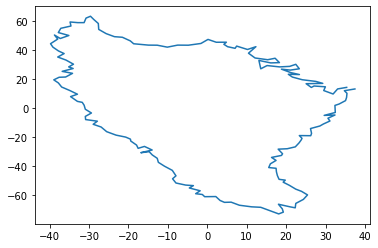

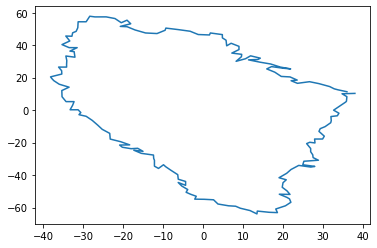

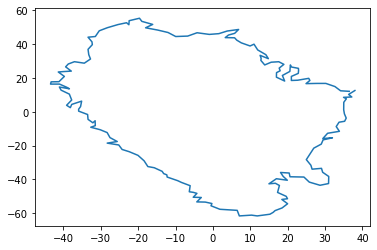

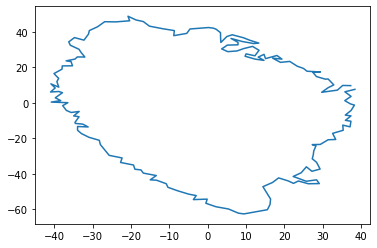

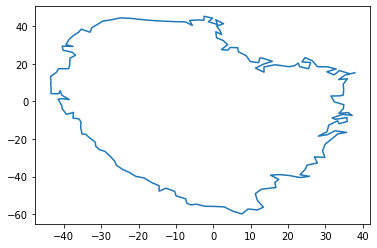

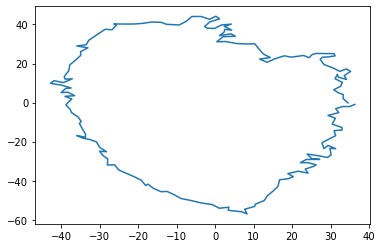

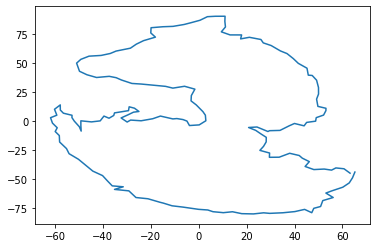

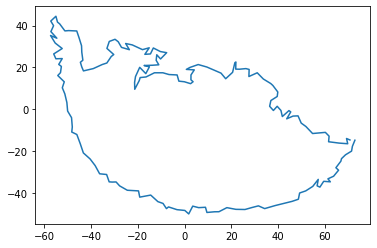

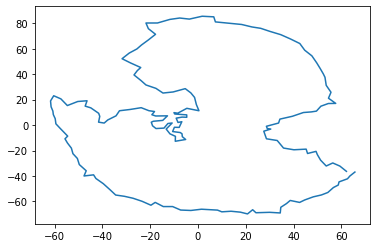

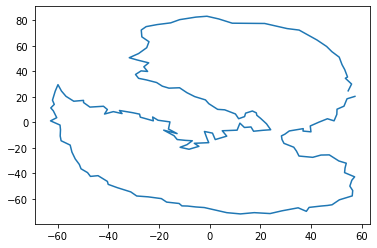

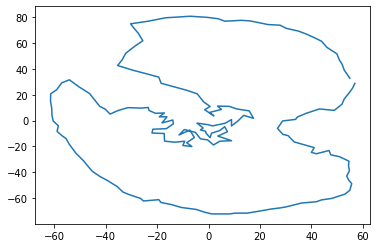

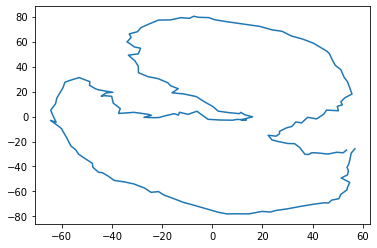

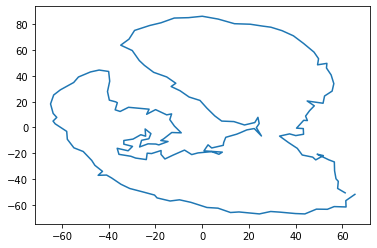

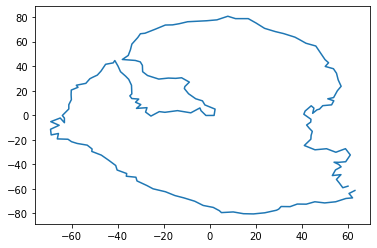

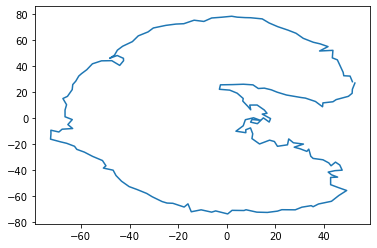

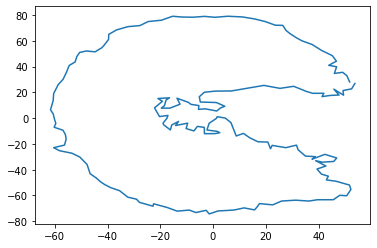

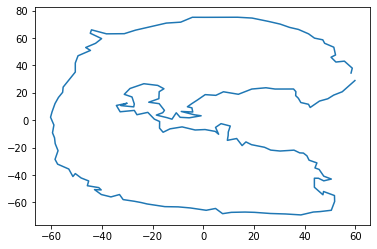

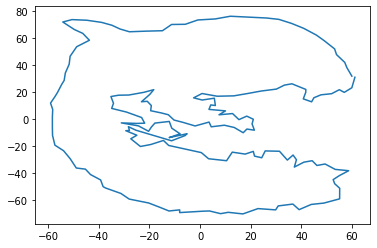

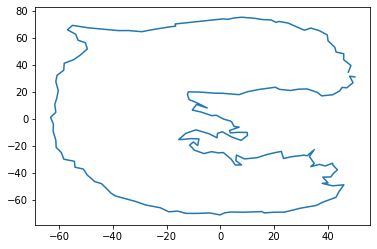

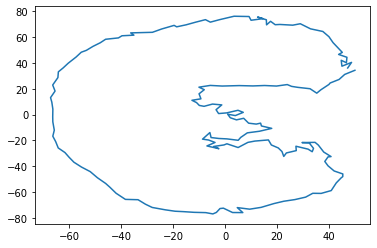

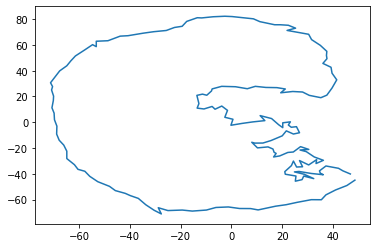

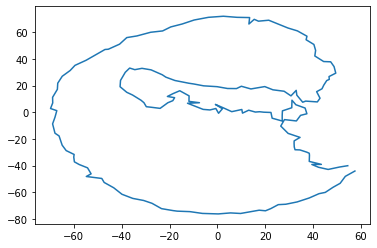

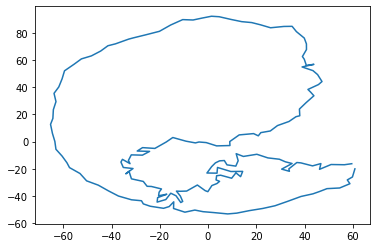

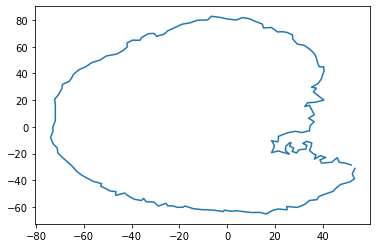

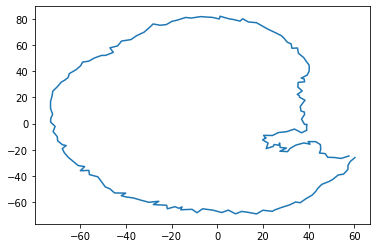

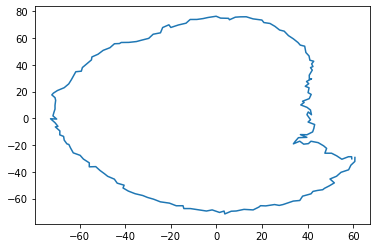

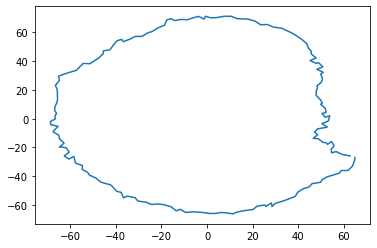

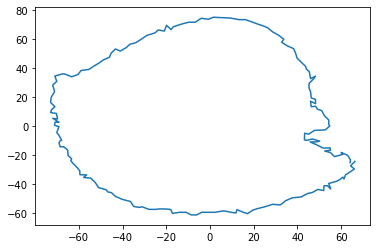

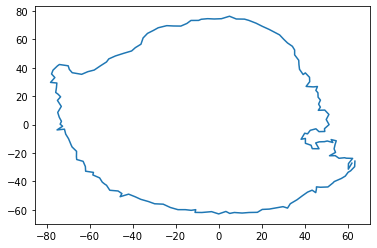

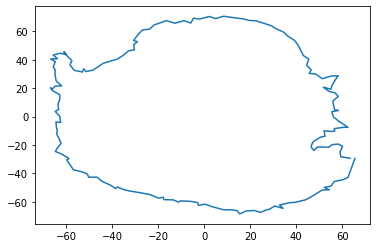

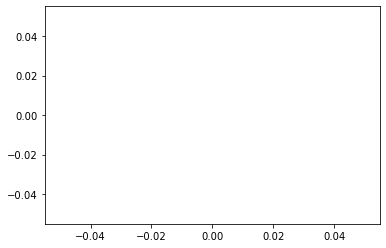

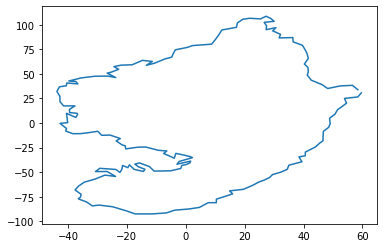

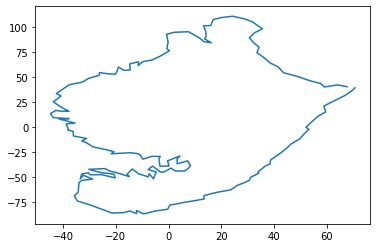

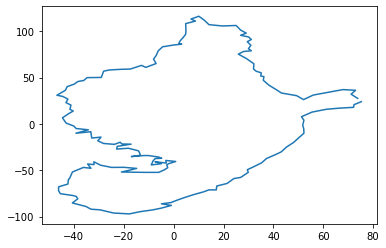

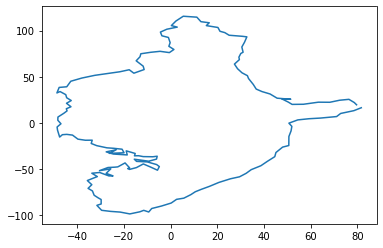

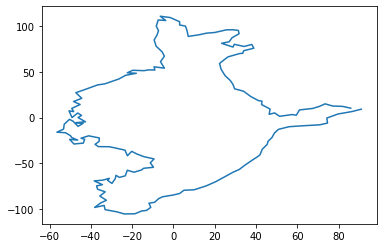

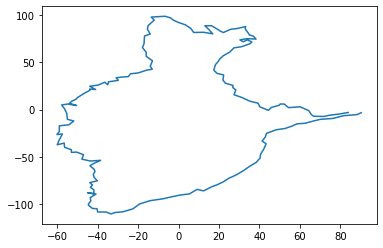

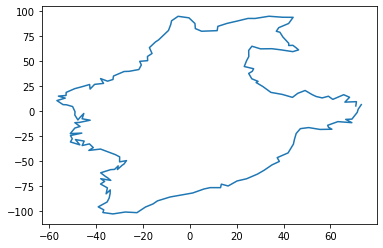

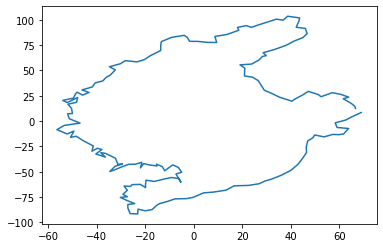

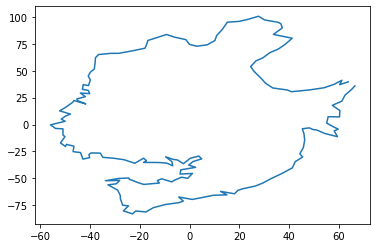

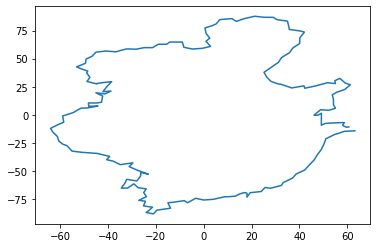

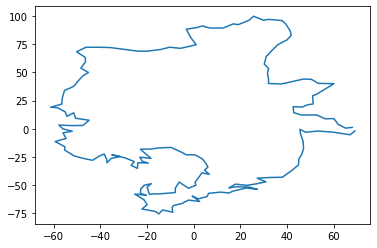

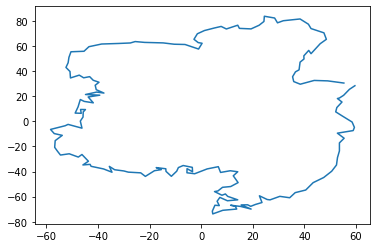

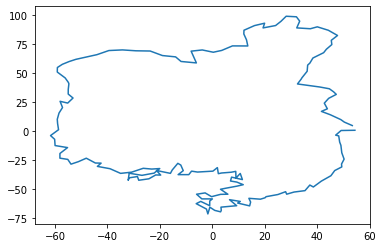

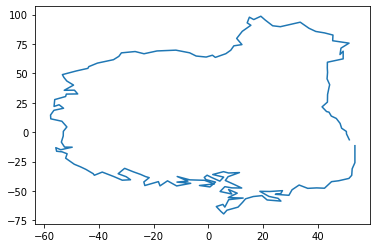

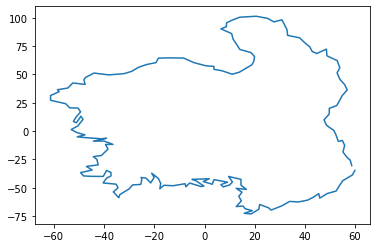

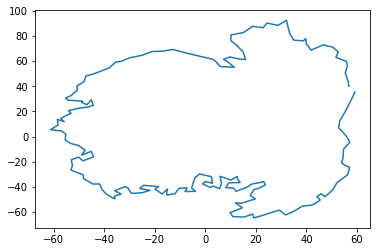

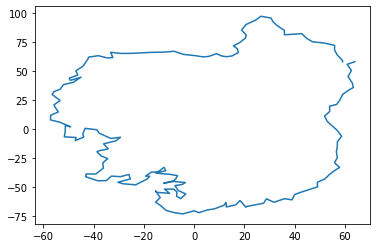

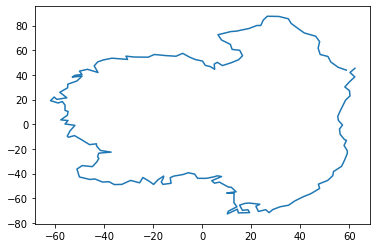

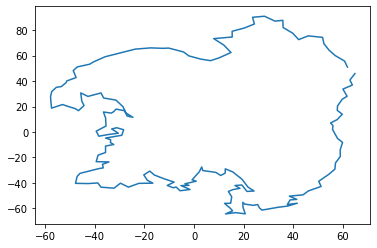

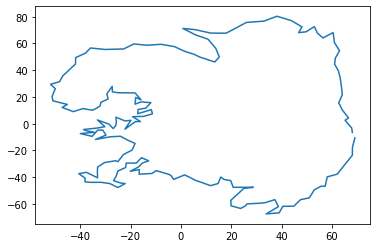

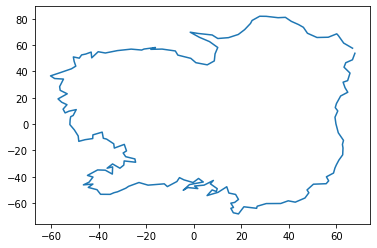

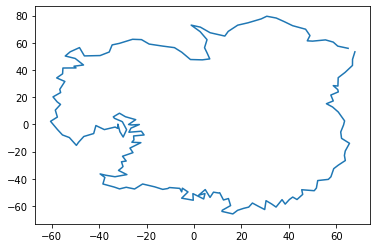

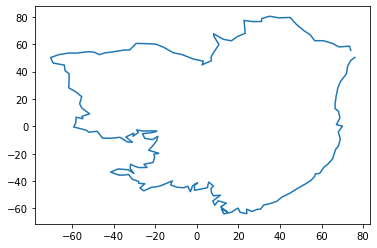

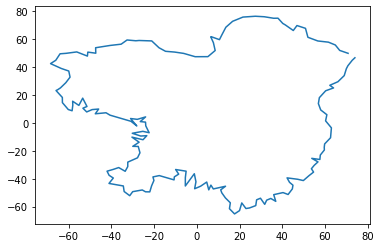

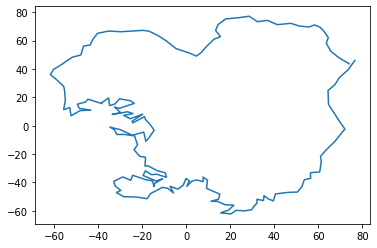

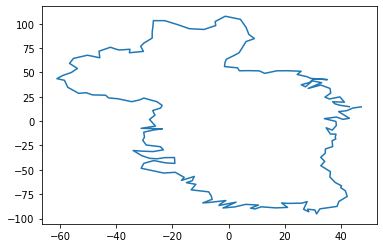

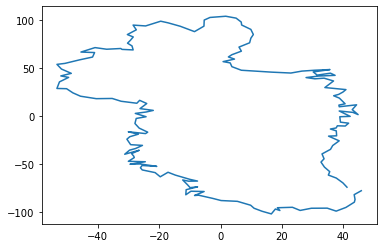

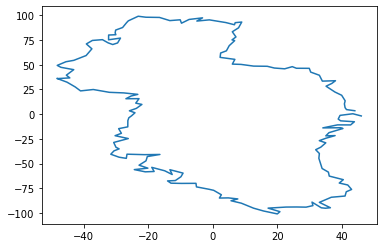

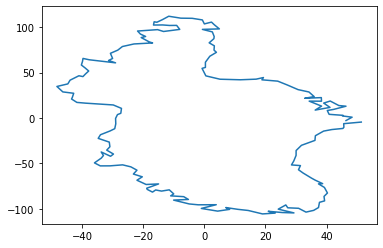

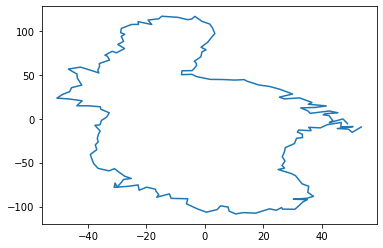

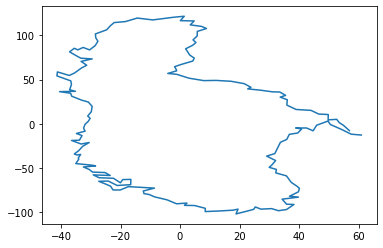

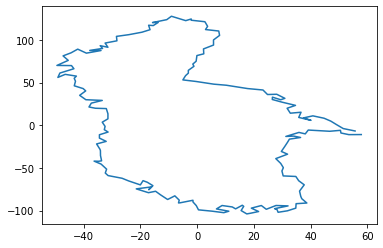

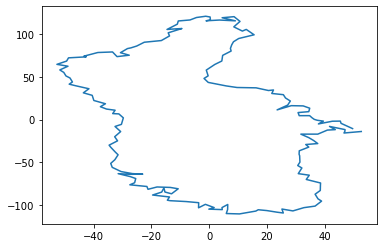

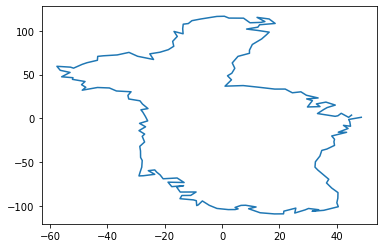

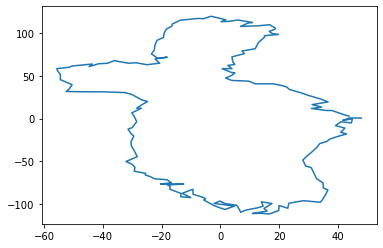

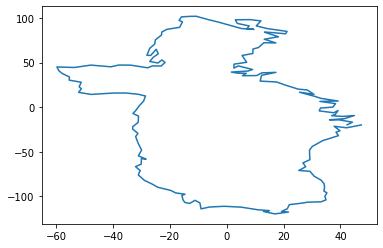

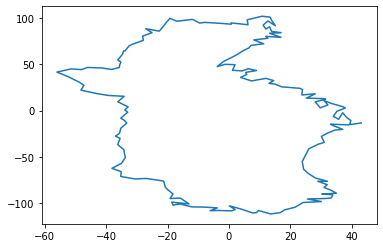

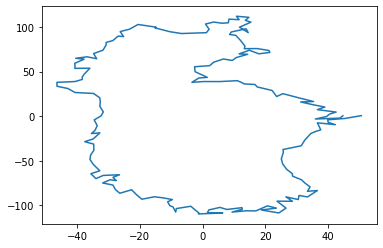

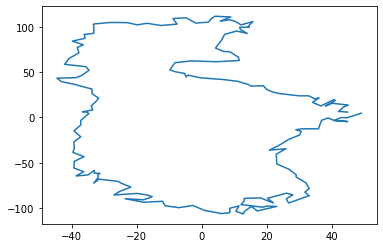

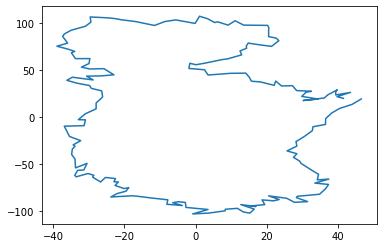

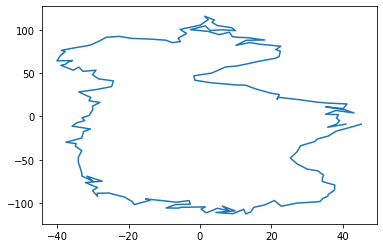

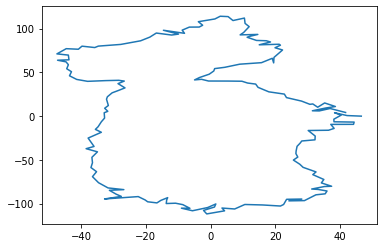

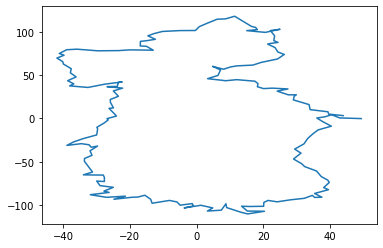

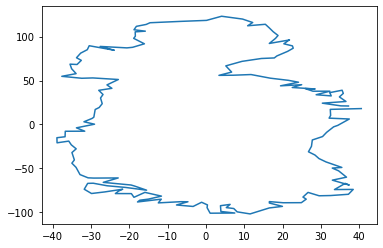

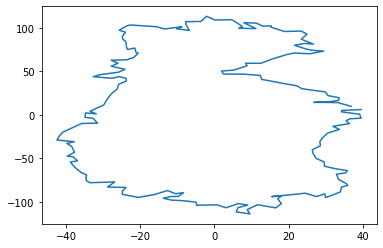

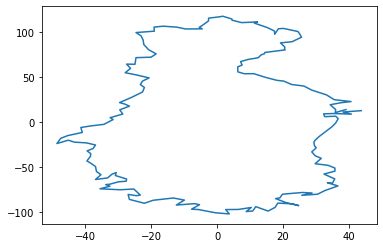

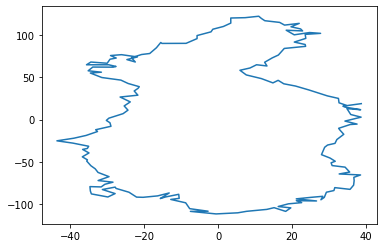

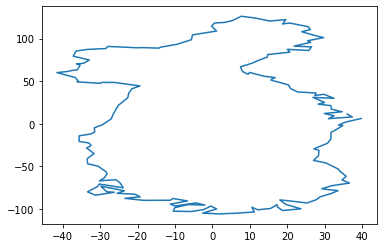

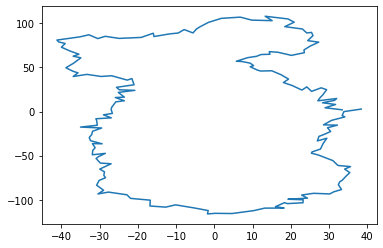

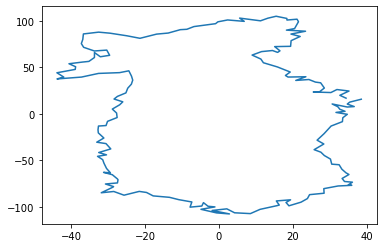

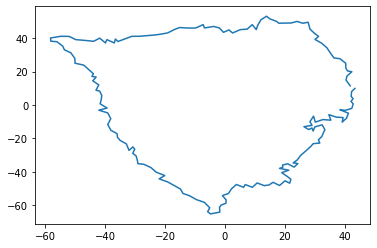

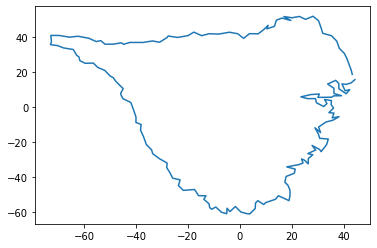

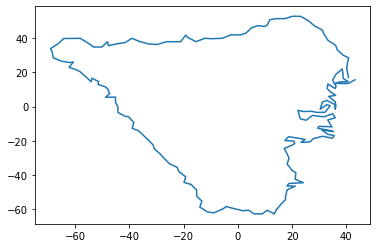

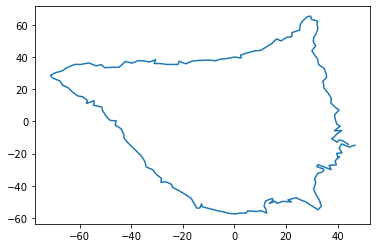

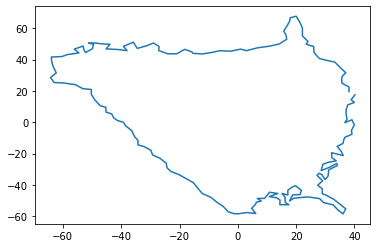

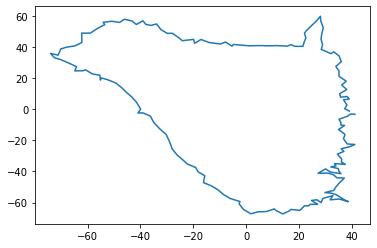

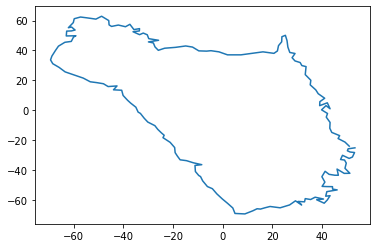

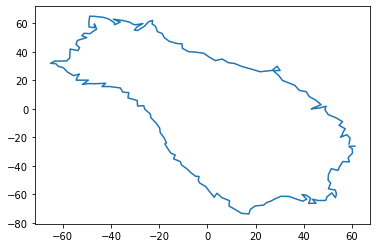

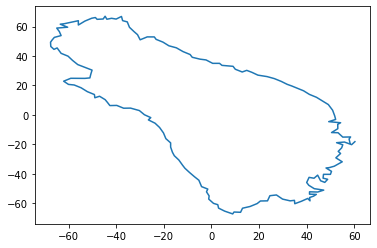

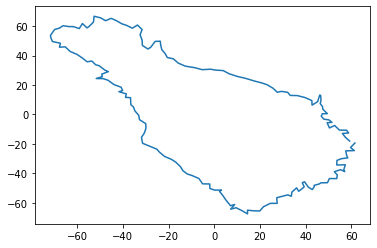

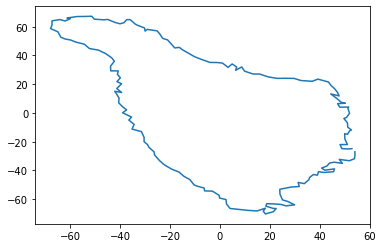

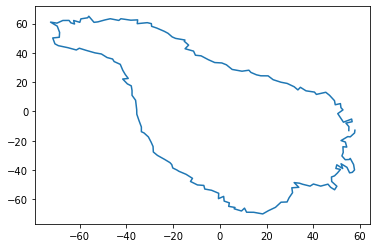

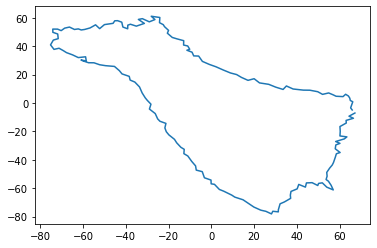

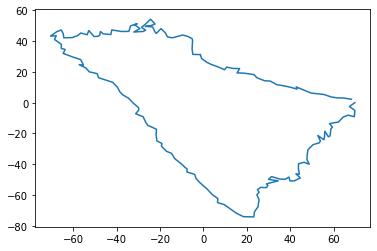

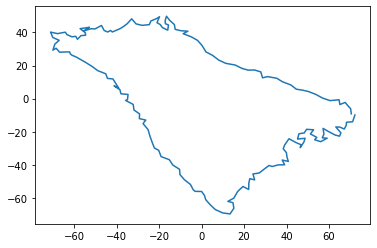

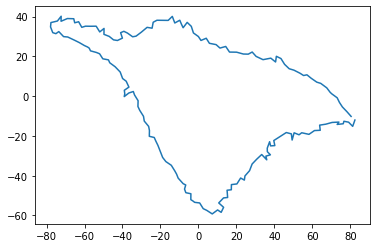

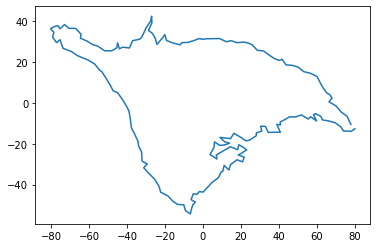

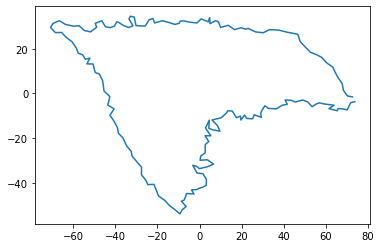

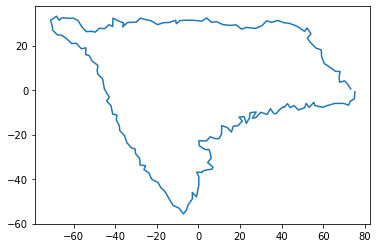

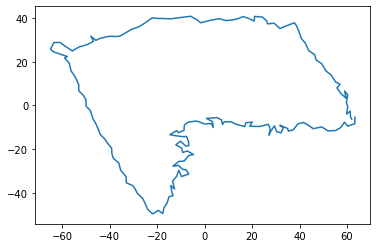

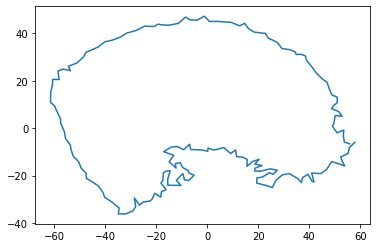

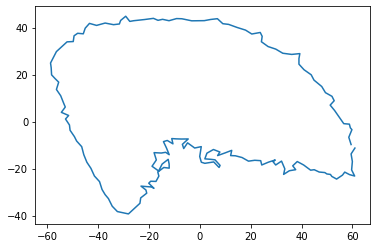

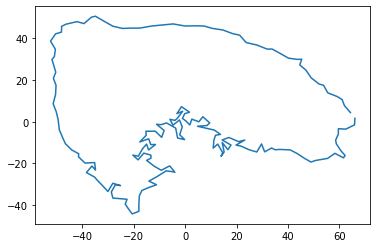

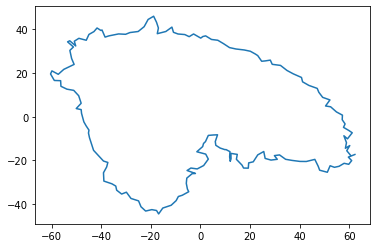

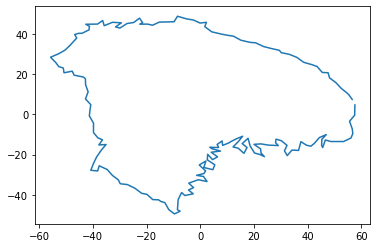

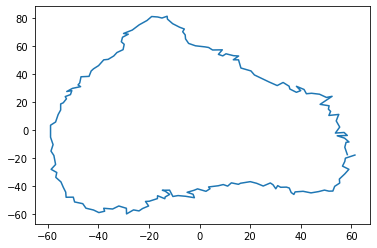

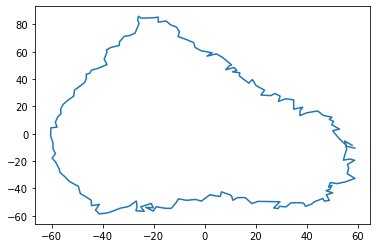

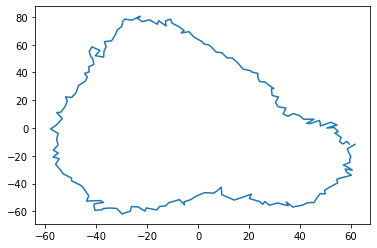

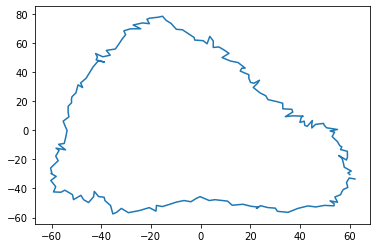

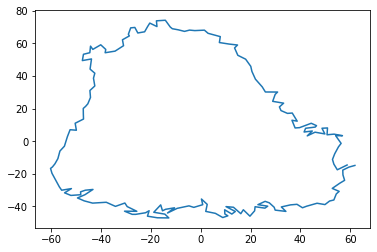

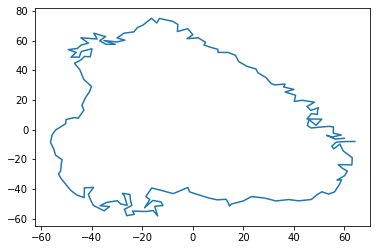

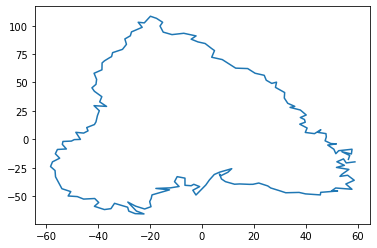

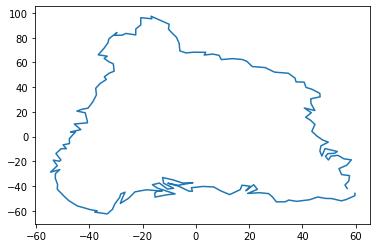

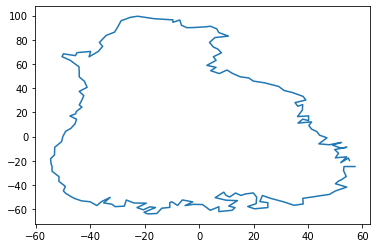

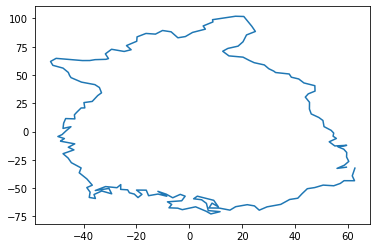

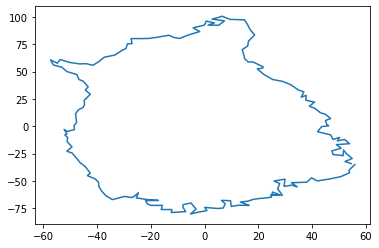

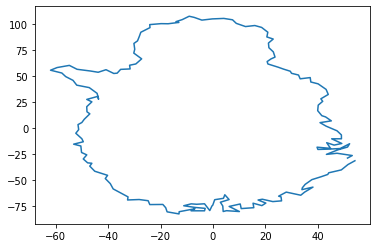

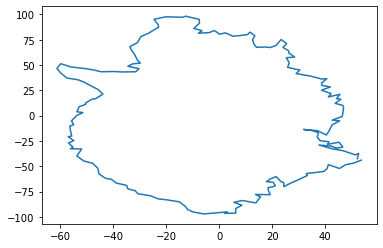

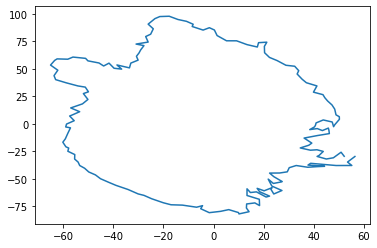

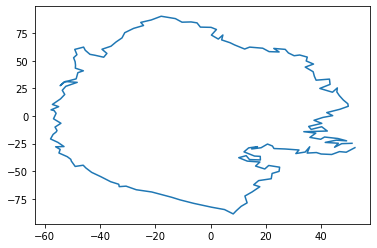

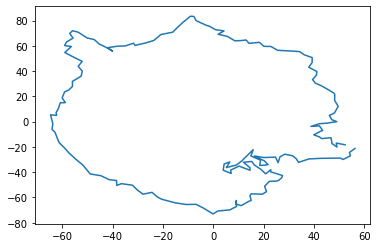

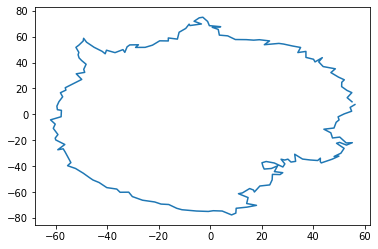

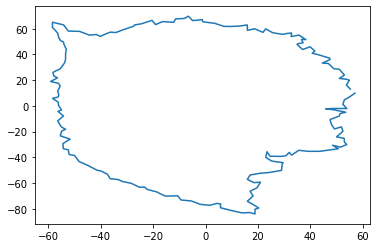

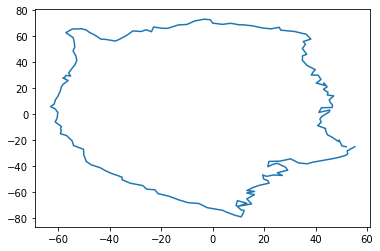

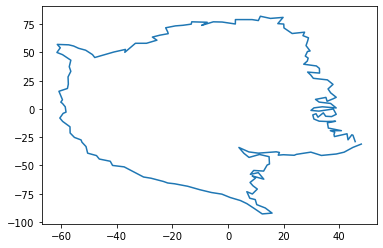

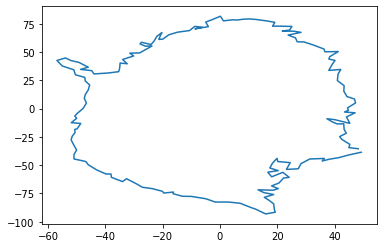

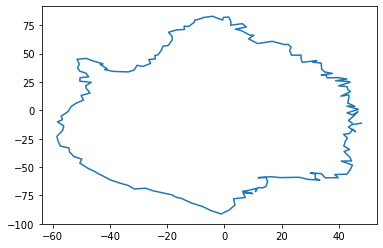

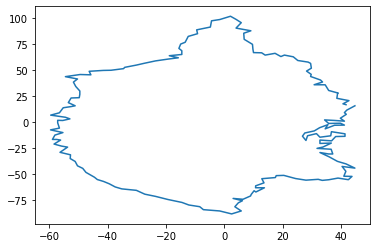

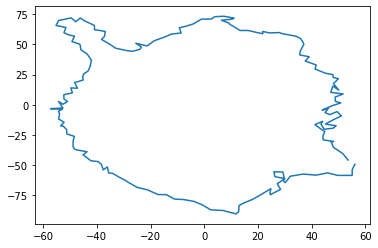

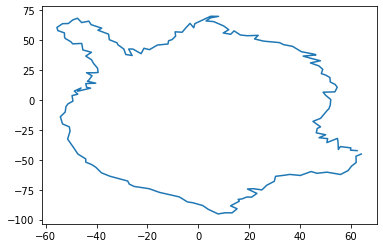

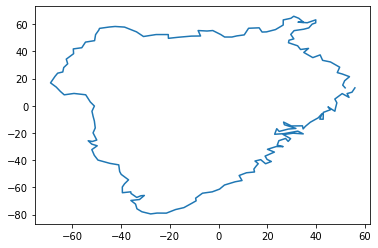

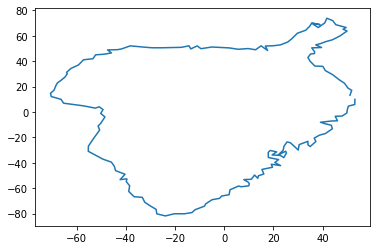

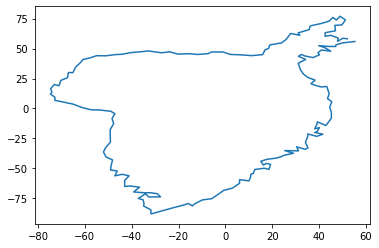

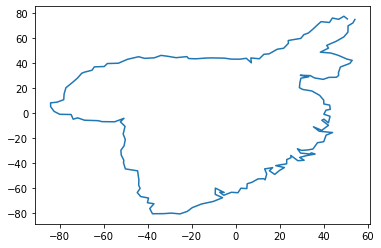

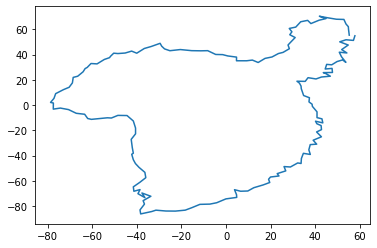

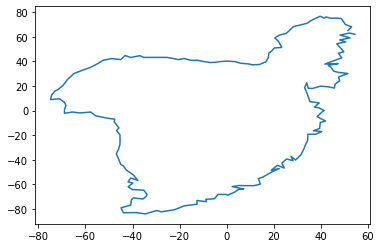

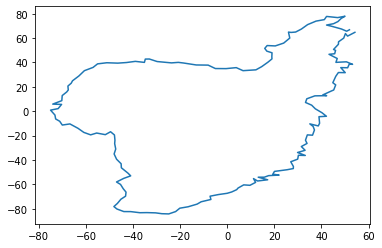

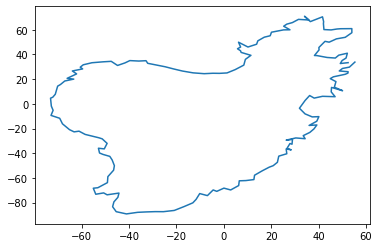

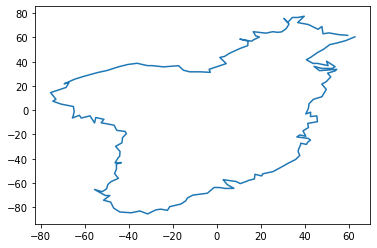

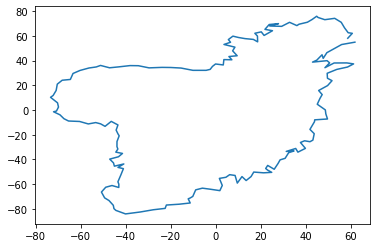

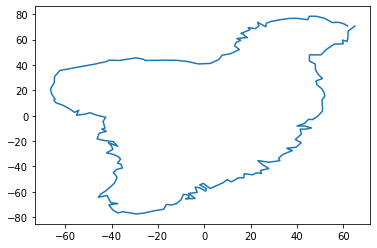

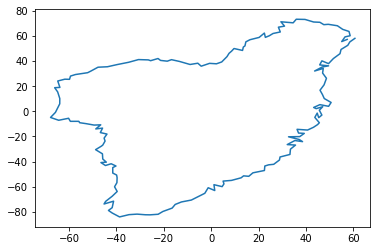

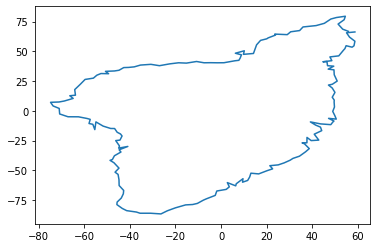

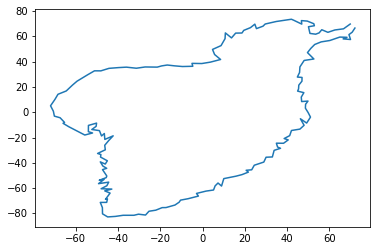

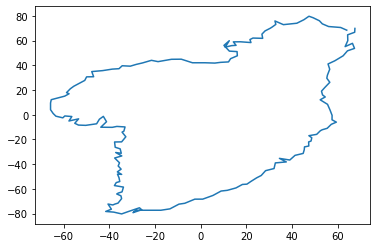

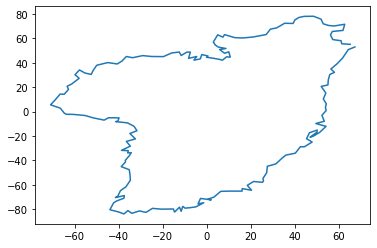

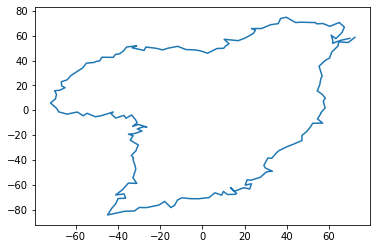

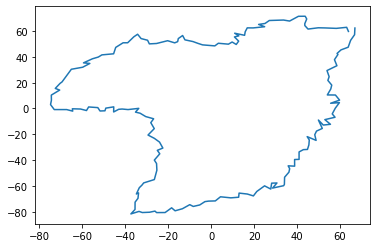

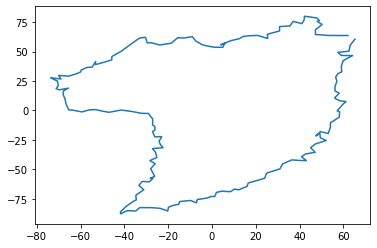

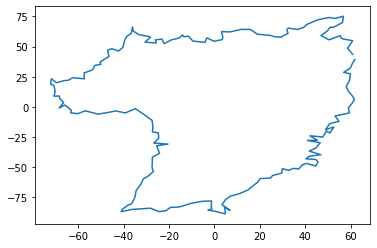

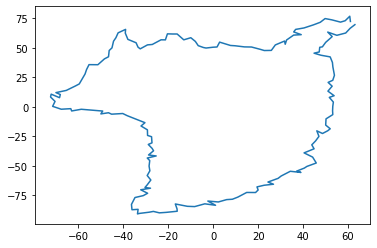

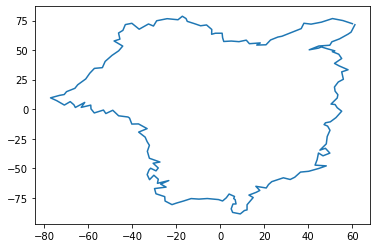

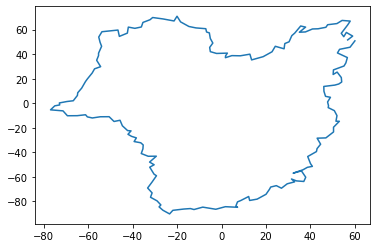

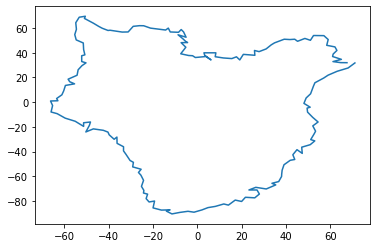

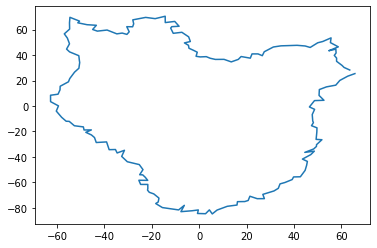

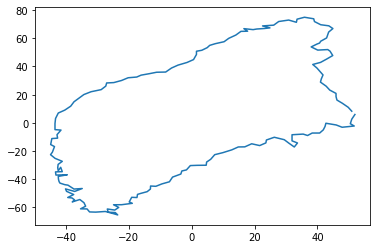

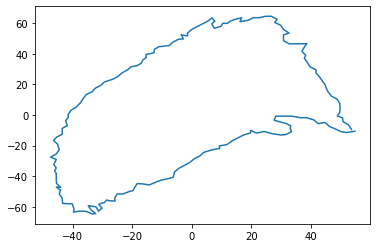

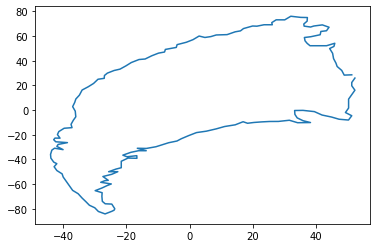

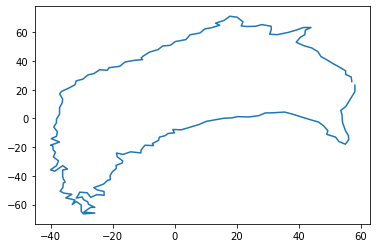

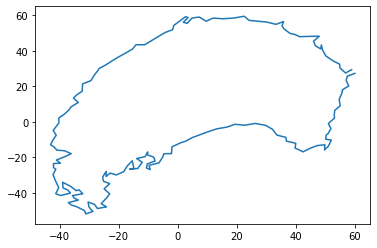

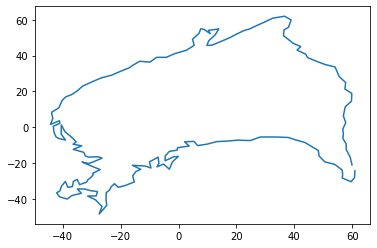

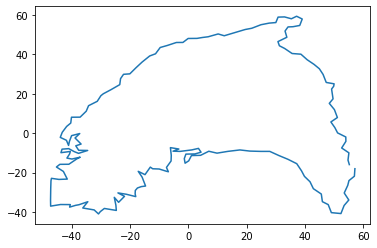

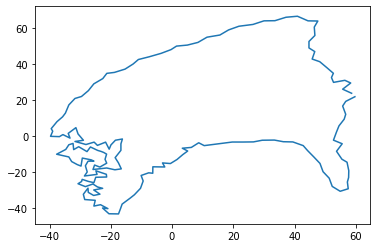

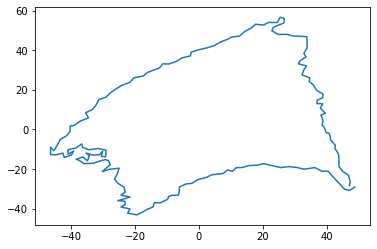

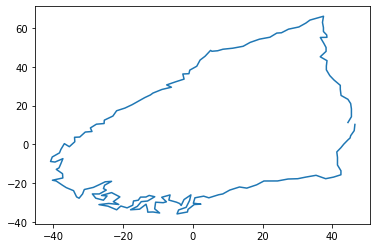

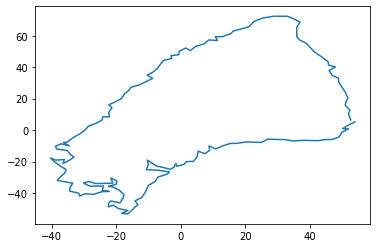

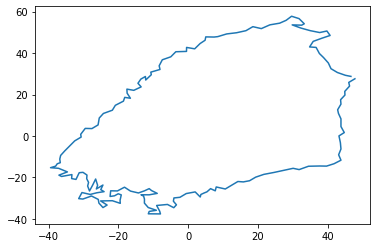

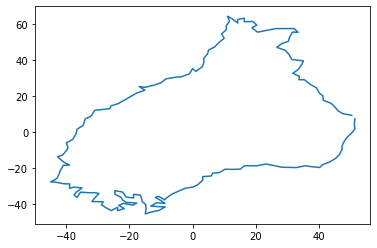

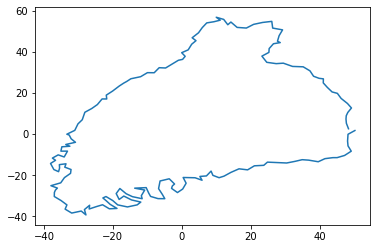

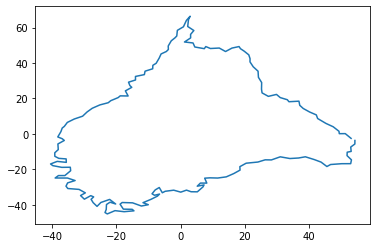

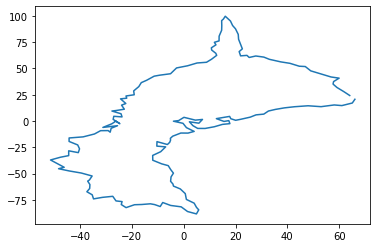

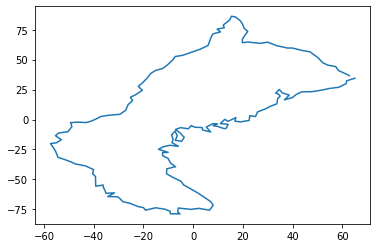

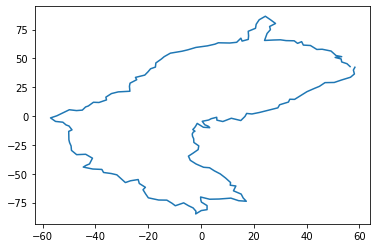

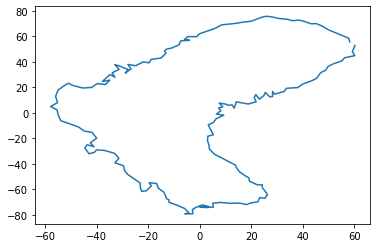

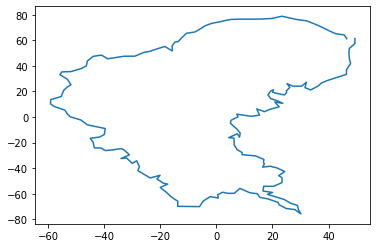

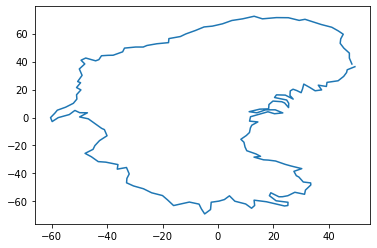

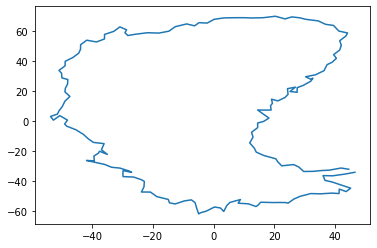

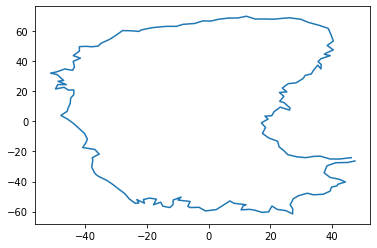

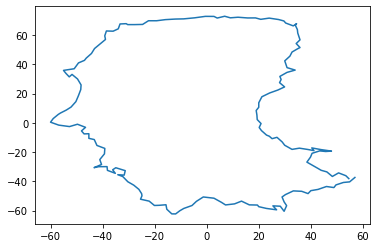

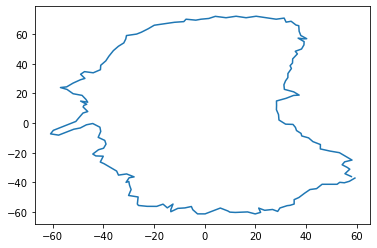

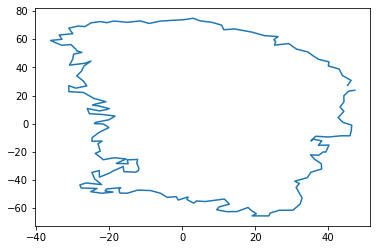

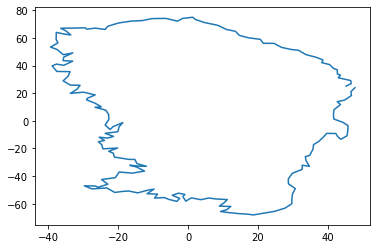

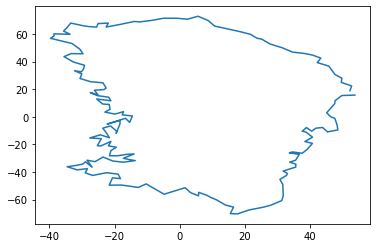

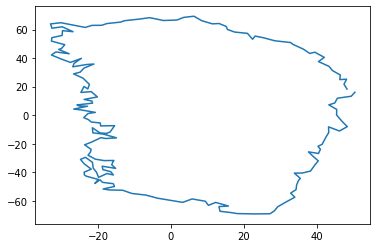

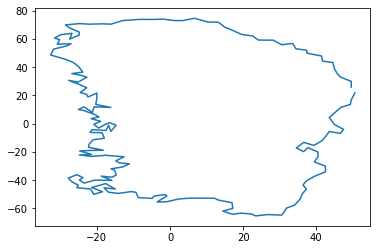

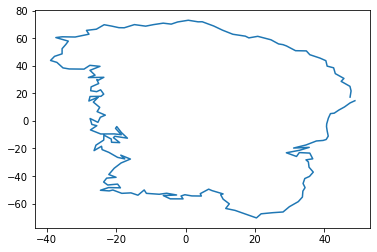

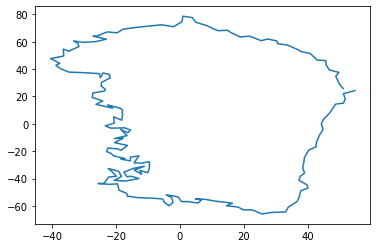

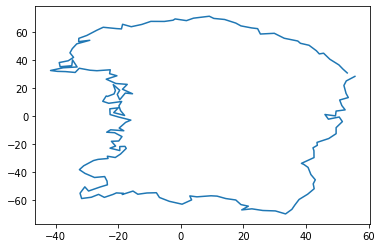

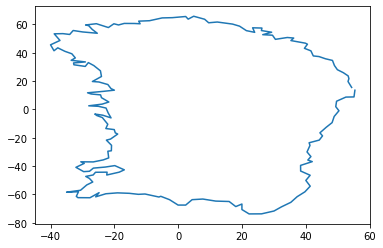

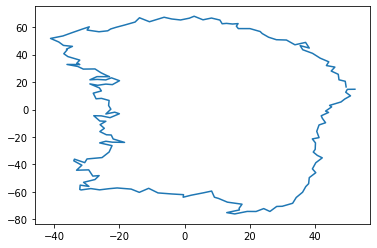

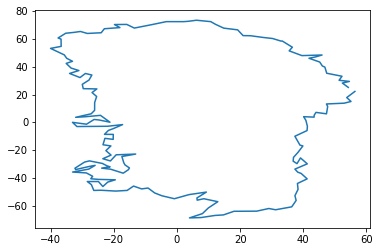

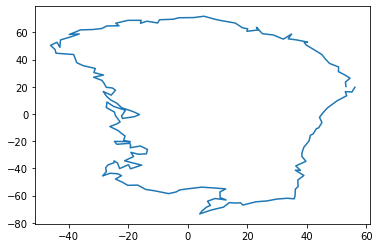

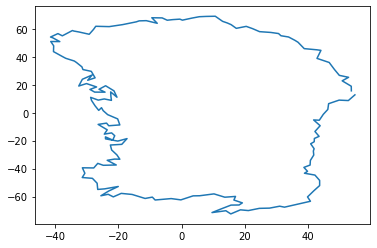

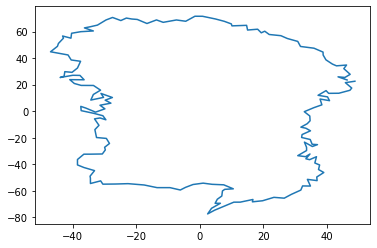

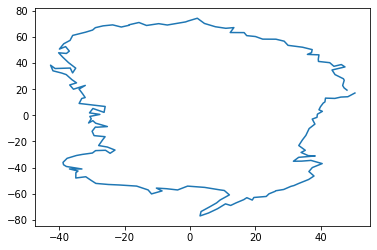

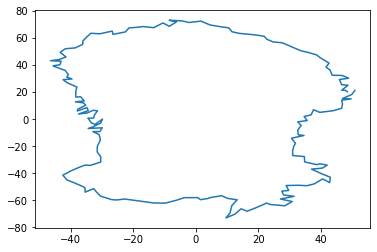

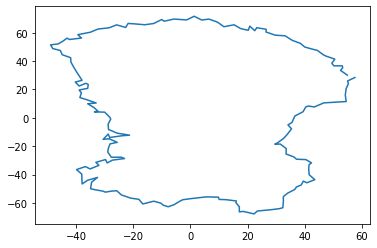

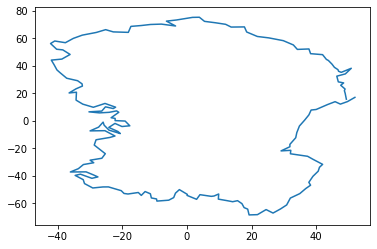

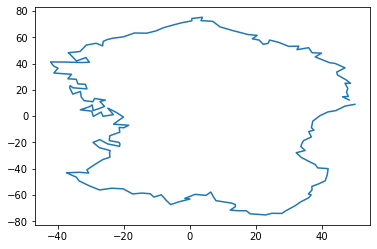

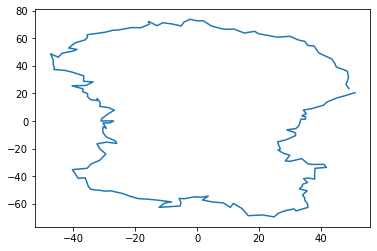

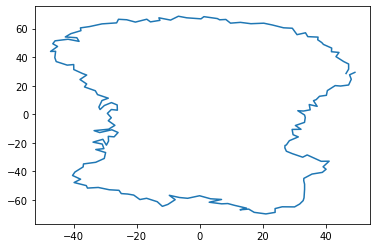

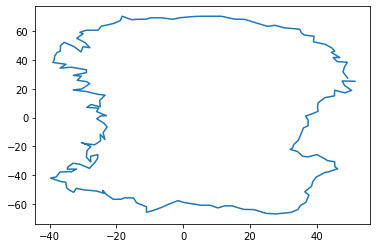

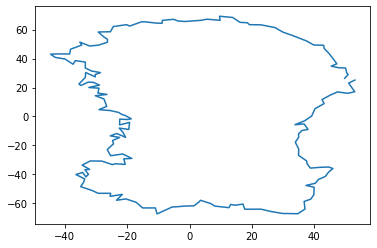

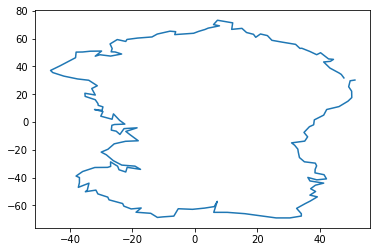

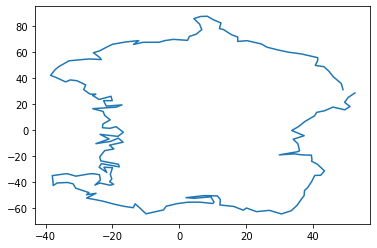

In [6]:
import matplotlib.pyplot as plt
for i in range(16):
    for j in range(25):
        plt.figure()
        plt.plot(shapes_traj[i, j, :, 0], shapes_traj[i, j, :, 1])

In [6]:
import numpy as np

np.savetxt(f"center_trajectories_n_sampling_points_100.txt", center_traj)
np.savetxt(f"shape_trajectories_n_sampling_points_100.txt", shapes_traj)

ValueError: Expected 1D or 2D array, got 3D array instead

import numpy as np

np.savetxt(f"center_trajectories_n_sampling_points_{n_sampling_points}.txt", center_traj)
np.savetxt(f"shape_trajectories_n_sampling_points_{n_sampling_points}.txt", shapes_traj)

In [4]:
import glob

glob.glob("/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/*.tif")

['/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/104438_MAX_9-10.tif',
 '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/104438_MAX_9-11.tif',
 '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/104438_MAX_9-7.tif',
 '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/104438_MAX_9-8.tif',
 '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/33623_MAX_9-1-28.tif',
 '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/33623_MAX_9-1.tif',
 '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/33623_MAX_9-2-1-28.tif',
 '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/33623_MAX_9-2.tif',
 '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/33623_MAX_9-3.tif',
 '/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells/33623_MAX_9-5.tif',
 '/Users/ninamiolane/code/dyn/dyn/datasets/single_border

In [31]:
import skimage.io as skio
import os
import pickle

In [28]:
folder = "/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells"
file = "33623_MAX_9-5.tif"
filepath = os.path.join(folder, file)

imstack1 = skio.imread(filepath, plugin="tifffile")


In [33]:
for video_name in os.listdir("/Users/ninamiolane/code/dyn/dyn/datasets/single_border_protusion_cells"):
    print(f"processing {video_name}")
    video_path = os.path.join(folder, video_name)
    img_stack = skio.imread(video_path, plugin="tifffile")
    cell_contours = []
    for img in img_stack:
        thresh = threshold_otsu(img)
        binary = image > thresh
        contours = measure.find_contours(binary, 0.8)
        lengths = [len(c) for c in contours]
        max_length = max(lengths)
        index_max_length = lengths.index(max_length)
        cell_contours.append(contours[index_max_length])
        
    name, extension = video_path.split(".")
    with open(f'{name}.pickle', 'wb') as handle:
        pickle.dump(cell_contours, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

processing 104438_MAX_9-10.tif
processing 104438_MAX_9-11.tif
processing 104438_MAX_9-7.tif
processing 104438_MAX_9-8.tif
processing 33623_MAX_9-1-28.tif
processing 33623_MAX_9-1.tif
processing 33623_MAX_9-2-1-28.tif
processing 33623_MAX_9-2.tif
processing 33623_MAX_9-3.tif
processing 33623_MAX_9-5.tif
processing 59080_MAX_9-10.tif
processing 59080_MAX_9-3.tif
processing 59080_MAX_9-5.tif
processing 59080_MAX_9-6.tif
processing 59080_MAX_9-7.tif
processing 59080_MAX_9-8.tif


In [5]:
imstack1.shape

(25, 287, 441)

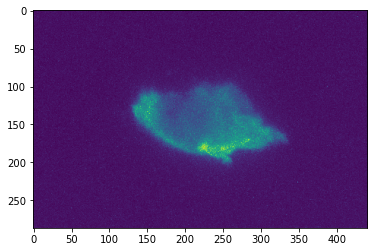

In [11]:
import matplotlib.pyplot as plt

for i in range(len(imstack1)):
    plt.figure()
    plt.imshow(imstack1[i])
    break

In [12]:
from skimage.filters import threshold_otsu

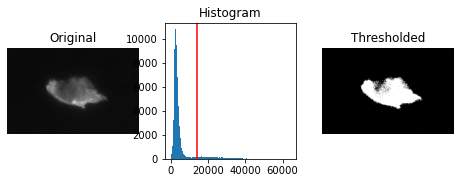

In [13]:
image = imstack1[0]
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

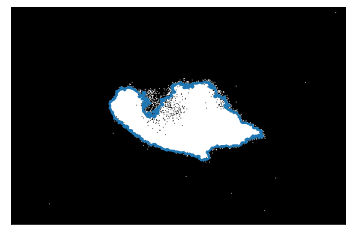

In [20]:
from skimage import measure


r = binary

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for contour in contours:
    l = contour.shape[0]
    if l < 100:
        #print("skip: l = ", l)
        continue
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [15]:
len(contours)

429

In [22]:
lengths = [len(c) for c in contours]
max_length = max(lengths)
index = lengths.index(max_length)
index

16

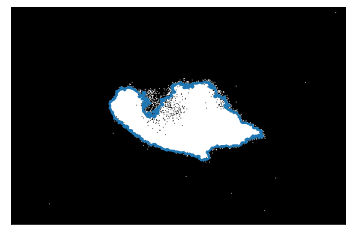

(1407, 2)


In [25]:
contour_found = contours[16]
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)
ax.plot(contour_found[:, 1], contour_found[:, 0], linewidth=2)
    

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

print(contour_found.shape)